In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from collections import deque
import datetime

<class 'list'>


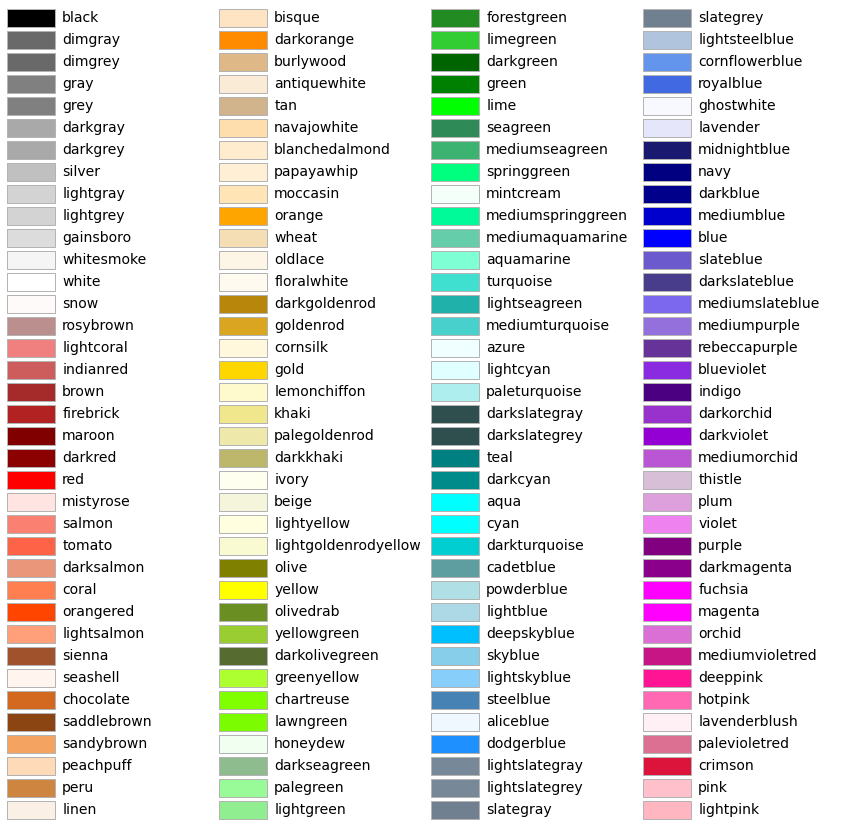

In [2]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):
    color_list = []
    print(type(color_list))
    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')
        color_list.append(name)
        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return color_list

color_list = plot_colortable(mcolors.CSS4_COLORS)


## 1. 파일호출

In [3]:
# 파일 불러오기
with open('../../data/df_da.pkl', 'rb') as f:
    df_da = pickle.load(f)


In [35]:
# 파일 불러오기
with open('../../data/df_body.pkl', 'rb') as f:
    df_body = pickle.load(f)


In [4]:
# 파일 불러오기
with open('../../data/df_user.pkl', 'rb') as f:
    df_user = pickle.load(f)

In [ ]:
# 파일 불러오기
with open('../../data/df_answer_cnt.pkl', 'rb') as f:
    df_answer_cnt = pickle.load(f)

In [3]:
# 파일 불러오기
with open('../../data/df_year_from_signup_a.pkl', 'rb') as f:
    df_year_from_signup_a = pickle.load(f)

In [4]:
# 파일 불러오기
with open('../../data/df_year_from_signup_qna.pkl', 'rb') as f:
    df_year_from_signup_qna = pickle.load(f)

In [5]:
# 파일 불러오기
with open('../../data/df_year_from_signup_q.pkl', 'rb') as f:
    df_year_from_signup_q = pickle.load(f)

In [6]:
# 파일 불러오기
with open('../../data/df_year_from_signup_a.pkl', 'rb') as f:
    df_year_from_signup_a = pickle.load(f)

In [7]:
# 파일 불러오기
with open('../../data/df_year_from_signup_a_mm.pkl', 'rb') as f:
    df_year_from_signup_a_mm = pickle.load(f)


In [8]:
# 파일 불러오기
with open('../../data/df_year_from_signup_q_mm.pkl', 'rb') as f:
    df_year_from_signup_q_mm = pickle.load(f)


In [9]:
# 파일 불러오기
with open('../../data/df_year_from_signup_qna_mm.pkl', 'rb') as f:
    df_year_from_signup_qna_mm = pickle.load(f)


In [10]:
# 파일 불러오기
with open('../../data/df_year_gpt_yn.pkl', 'rb') as f:
    df_year_gpt_yn = pickle.load(f)


In [11]:
# 파일 불러오기
with open('../../data/df_usr_post_cre_avg_med.pkl', 'rb') as f:
    df_usr_post_cre_avg_med = pickle.load(f)

In [12]:
# 파일 불러오기
with open('../../data/df_diff_usrcre_avg_med.pkl', 'rb') as f:
    df_diff_usrcre_avg_med = pickle.load(f)


In [13]:
# 파일 불러오기
with open('../../data/df_no_post_per_year.pkl', 'rb') as f:
    df_no_post_per_year = pickle.load(f)

In [14]:
# 파일 불러오기
with open('../../data/df_year_from_signup_cnt.pkl', 'rb') as f:
    df_year_from_signup_cnt = pickle.load(f)


In [15]:
# 파일 불러오기
with open('../../data/df_active_usr_per_year.pkl', 'rb') as f:
    df_active_usr_per_year = pickle.load(f)


In [16]:
# 파일 불러오기
with open('../../data/df_active_usr_per_day.pkl', 'rb') as f:
    df_active_usr_per_day = pickle.load(f)



In [17]:
# df_usr_post_cre_cnt
with open('../../data/df_usr_post_cre_cnt.pkl', 'rb') as f:
    df_usr_post_cre_cnt = pickle.load(f)

In [18]:
# df_vote_cnt_per_day df_vote_cnt_within_1month_per_day
with open('../../data/df_vote_cnt_per_day.pkl', 'rb') as f:
    df_vote_cnt_per_day = pickle.load(f)

In [19]:
# df_vote_cnt_within_1month_per_day
with open('../../data/df_vote_cnt_within_1month_per_day.pkl', 'rb') as f:
    df_vote_cnt_within_1month_per_day = pickle.load(f)

In [20]:
# df_vote_cnt_within_1month_per_day_qna
with open('../../data/df_vote_cnt_within_1month_per_day_qna.pkl', 'rb') as f:
    df_vote_cnt_within_1month_per_day_qna = pickle.load(f)

EOFError: Ran out of input

In [21]:
# df_vote_cnt_within_1month_per_daytype_qna
with open('../../data/df_vote_cnt_within_1month_per_daytype_qna.pkl', 'rb') as f:
    df_vote_cnt_within_1month_per_daytype_qna = pickle.load(f)

In [44]:
with open('../../data/df_usr_q_cre_avg_med.pkl', 'rb') as f:
    df_usr_q_cre_avg_med = pickle.load(f)

In [45]:
with open('../../data/df_usr_a_cre_avg_med.pkl', 'rb') as f:
    df_usr_a_cre_avg_med = pickle.load(f)


In [ ]:
df_da['date']   = df_da['q_creationdate'].dt.date
df_da['year']   = df_da['q_creationdate'].dt.year
df_da['month']  = df_da['q_creationdate'].dt.month
df_da['day']    = df_da['q_creationdate'].dt.day

In [161]:
df_body['date'] = df_body['creationdate'].dt.date
df_body['year'] = df_body['creationdate'].dt.year
df_body['month'] = df_body['creationdate'].dt.month
df_body['day'] = df_body['creationdate'].dt.day

In [ ]:
df_da['date']   = df_da['q_creationdate'].dt.date
df_da['year']   = df_da['q_creationdate'].dt.year
df_da['month']  = df_da['q_creationdate'].dt.month
df_da['day']    = df_da['q_creationdate'].dt.day

## 2. POST

### Number of Questions and Answers over time

In [162]:
# Q&A 만 추출 
df_body = df_body[df_body['posttypeid'].isin(['1','2'])]

In [163]:
df_qna_num = df_body.groupby(['date', 'posttypeid']).count()[['id']].reset_index()

In [164]:
df_qna_num[df_qna_num['posttypeid'] =='1'].date

0       2013-11-01
2       2013-11-02
4       2013-11-03
6       2013-11-04
8       2013-11-05
           ...    
7354    2023-11-26
7356    2023-11-27
7358    2023-11-28
7360    2023-11-29
7362    2023-11-30
Name: date, Length: 3682, dtype: object

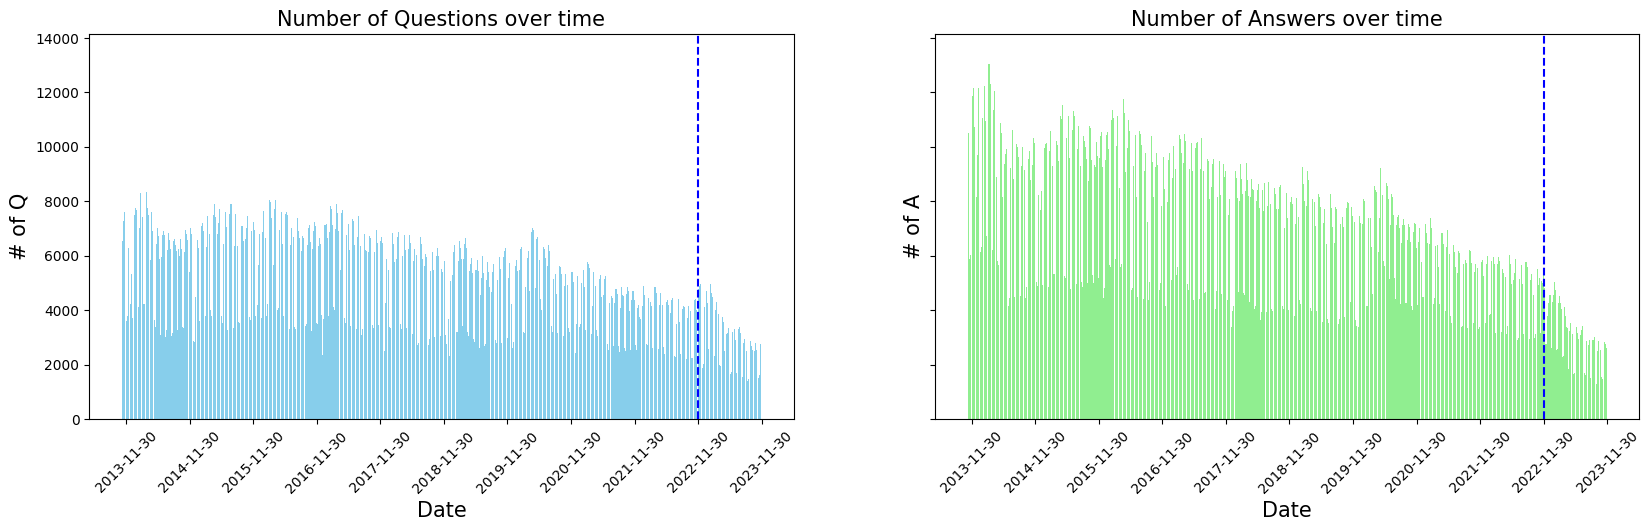

In [165]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
# yticks = np.arange(200, 2000, 400)
axs[0].bar(df_qna_num[df_qna_num['posttypeid'] =='1'].date
        ,  df_qna_num[df_qna_num['posttypeid'] =='1'].id
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Number of Questions over time', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('# of Q', fontsize = 15)
axs[0].set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
axs[0].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].bar(df_qna_num[df_qna_num['posttypeid'] =='2'].date
        ,  df_qna_num[df_qna_num['posttypeid'] =='2'].id
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Number of Answers over time', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('# of A', fontsize = 15)
axs[1].set_xticks(major_xticks)
# axs[1].set_yticks(yticks)
axs[1].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();


In [166]:
df_body.groupby(['posttypeid']).count()[['id']]

,id
posttypeid,
1,18402542
2,24949500


In [167]:
df_body['body_len'] = df_body['body'].apply(lambda x : len(x))

/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_95968/4100759064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_body['body_len'] = df_body['body'].apply(lambda x : len(x))


In [168]:
df_body.groupby(['year', 'month', 'day', 'posttypeid']).mean(['body_len'])

id   owneruserid  answered_yn  \
year month day posttypeid                                            
2013 11    1   1           1.972813e+07  1.841639e+06     0.920378   
               2           1.972810e+07  1.403717e+06     0.000000   
           2   1           1.974295e+07  1.917220e+06     0.924562   
               2           1.974286e+07  1.427736e+06     0.000000   
           3   1           1.975406e+07  1.926541e+06     0.922533   
...                                 ...           ...          ...   
2023 11    28  2           7.756421e+07  1.020143e+07     0.000000   
           29  1           7.757154e+07  1.443985e+07     0.396988   
               2           7.757147e+07  1.031414e+07     0.000000   
           30  1           7.757877e+07  1.440473e+07     0.377386   
               2           7.757872e+07  9.984061e+06     0.000000   

                              body_len  
year month day posttypeid               
2013 11    1   1           1450.568222  
               2            750.325224  
           2   1           1485.227520  
               2            791.170160  
           3   1           1477.717557  
...                                ...  
2023 11    28  2           1102.488786  
           29  1           1971.581984  
               2           1157.715929  
           30  1           2048.297571  
               2           1194.023677  

[7364 rows x 4 columns]

In [169]:
df_bodycnt = df_body.groupby(['date', 'posttypeid']).count()[['id']].reset_index()

In [170]:
df_bodycnt = pd.pivot_table(df_bodycnt, index = 'date', columns = 'posttypeid', values = 'id').reset_index()

In [171]:
df_bodycnt['q_over_a'] = df_bodycnt['2'].div(df_bodycnt['1'])

### Question over Answer

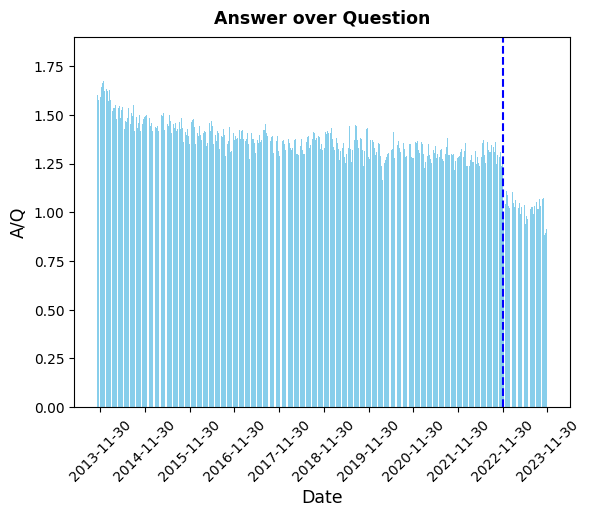

In [173]:
fig, ax = plt.subplots()


ax.bar(df_bodycnt.date
    ,  height = df_bodycnt['q_over_a']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Answer over Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A/Q", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();



In [174]:
df_bodyanswerdyn = df_body[df_body['posttypeid'] =='1'].groupby(['date', 'answered_yn']).count()[['id']].reset_index()

In [175]:
df_bodyanswerdyn = pd.pivot_table(df_bodyanswerdyn, index = 'date', columns = 'answered_yn', values = 'id').reset_index()

In [176]:
df_bodyanswerdyn['rate'] = df_bodyanswerdyn[1] / (df_bodyanswerdyn[1] + df_bodyanswerdyn[0])

### Ratio of Answered Question

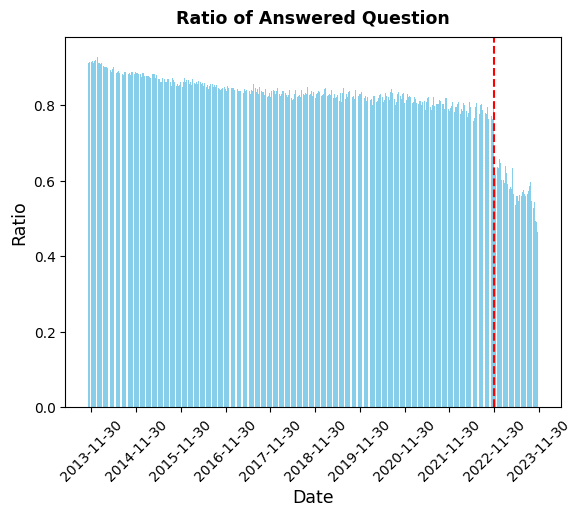

In [177]:
fig, ax = plt.subplots()


ax.bar(df_bodyanswerdyn.date
    ,  height = df_bodyanswerdyn['rate']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Ratio of Answered Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Ratio", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

### Answer Count line plot

In [ ]:
df_answer_cnt

In [ ]:
df_answer_cnt.loc[(df_answer_cnt['year']== '2020'), 'cnt'].value_counts().sort_index().to_frame()['count']

In [ ]:
fig, ax = plt.subplots()


ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2019'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'red',
        label = '2019.11'
) 

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2020'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'orange',
        label = '2020.11'
) 

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2021'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'green',
        label = '2021.11'
# label = ['question', 'answer']
) # create legened labels

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2022'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'blue',
         label = '2022.11'
        # label = ['question', 'answer']
        ) # create legened labels

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2023'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'purple', # bar color
        label = '2023.11'
        ) # create legened labels





ax.set_title('Answer Count line plot', fontsize = 15) # title
ax.set_xlabel('count', fontsize = 12.5) # x-axis label
ax.set_ylabel('value', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Minimun timedelta to get response per Date
* 질문과 첫번째 답 사이 gap 에 대한 time distribution

In [ ]:
df_da['qna_diff'] = df_da['a_creationdate'] - df_da['q_creationdate']

In [ ]:
df_da_df = df_da.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1)

In [ ]:
df_da_df['qna_diff_int'] = df_da_df['qna_diff']/ pd.Timedelta(minutes=1)

In [ ]:
df_da_df[['qna_diff', 'qna_diff_int', 'date']]

In [ ]:
df_da_df_dff        = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).mean().reset_index()
df_da_df_dff_min    = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).min().reset_index()
df_da_df_dff_max    = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).max().reset_index()
df_da_df_dff_median = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).median().reset_index()


In [ ]:
df_da_df_dff.head()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_df_dff.date
    ,  height = df_da_df_dff['qna_diff_int']
    ,  color = 'skyblue'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_df_dff_median.date
    ,  height = df_da_df_dff_median['qna_diff_int']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

### Minimun timedelta to get response per Day in 1 month 
* 질문과 첫번째 답 사이 gap 에 대한 time distribution

In [ ]:
df_da_in_month = df_da[df_da['qna_diff'].dt.days <=30]

In [ ]:
df_da_in_month_df = df_da_in_month.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1)

In [ ]:
df_da_in_month_df['qna_diff_int'] = df_da_in_month_df['qna_diff']/ pd.Timedelta(minutes=1)

In [ ]:
df_da_in_month_df        = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).mean().reset_index()
df_da_in_month_df_min    = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).min().reset_index()
df_da_in_month_df_max    = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).max().reset_index()
df_da_in_month_df_median = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).median().reset_index()


In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_in_month_df.date
    ,  height = df_da_in_month_df['qna_diff_int']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Day in 1 Month", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_in_month_df_median.date
    ,  height = df_da_in_month_df_median['qna_diff_int']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Day in 1 Month", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

### Distribution of Timedelta

In [ ]:
fig, ax = plt.subplots()


# ax.bar(df_date_per_len_max_q.index
#     ,  height = df_date_per_len_max_q['body_len']
#     ,  color = 'green'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.hist(df_da_df_dff['qna_diff_int'], # specify data
        bins = 20, # number of bins

        edgecolor = 'black', # bar edge color
        histtype = 'bar', # type of histogram
        label = ['Answer Count', 'User Count']) # create legened labels

# ax.bar(df_date_per_len_min_q.index
#     ,  height = df_date_per_len_min_q['body_len']
#     ,  color = 'red'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.set_title("Distribution of Timedelta", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Timedelta", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# ax.set_xticks(major_xticks)

# ax.axvline(['2022-11-30'], # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)



# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

plt.show();

### Length of Questions per Date

In [ ]:
df_body.groupby(['year', 'month', 'day', 'posttypeid']).mean(['body_len'])

In [ ]:
df_date_per_len = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['body_len']).reset_index()
df_date_per_len_min = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).min(['body_len']).reset_index()
df_date_per_len_max = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['body_len']).reset_index()
df_date_per_len_median = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).median(['body_len']).reset_index()

In [ ]:
df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['body_len'])

In [ ]:
df_date_per_len_q = df_date_per_len[df_date_per_len['posttypeid'] =='1']
df_date_per_len_q = df_date_per_len_q.set_index('date')
df_date_per_len_a = df_date_per_len[df_date_per_len['posttypeid'] =='2']
df_date_per_len_a = df_date_per_len_a.set_index('date')

In [ ]:
df_date_per_len_min_q = df_date_per_len_min[df_date_per_len_min['posttypeid'] =='1']
df_date_per_len_min_q = df_date_per_len_min_q.set_index('date')
df_date_per_len_min_a = df_date_per_len_min[df_date_per_len_min['posttypeid'] =='2']
df_date_per_len_min_a = df_date_per_len_min_a.set_index('date')

In [ ]:
df_date_per_len_max_q = df_date_per_len_max[df_date_per_len_max['posttypeid'] =='1']
df_date_per_len_max_q = df_date_per_len_max_q.set_index('date')
df_date_per_len_max_a = df_date_per_len_max[df_date_per_len_max['posttypeid'] =='2']
df_date_per_len_max_a = df_date_per_len_max_a.set_index('date')

In [ ]:
df_date_per_len_median_q = df_date_per_len_median[df_date_per_len_median['posttypeid'] =='1']
df_date_per_len_median_q = df_date_per_len_median_q.set_index('date')
df_date_per_len_median_a = df_date_per_len_median[df_date_per_len_median['posttypeid'] =='2']
df_date_per_len_median_a = df_date_per_len_median_a.set_index('date')

In [ ]:
fig, ax = plt.subplots()


# ax.bar(df_date_per_len_max_q.index
#     ,  height = df_date_per_len_max_q['body_len']
#     ,  color = 'green'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.bar(df_date_per_len_q.index
    ,  height = df_date_per_len_q['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_len_median_q.index
    ,  height = df_date_per_len_median_q['body_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type


# ax.bar(df_date_per_len_min_q.index
#     ,  height = df_date_per_len_min_q['body_len']
#     ,  color = 'red'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.set_title("Length of Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
df_date_per_len_diff = (df_date_per_len_max_q['body_len'] - df_date_per_len_min_q['body_len']).to_frame()

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_date_per_len_diff.index
    ,  height = df_date_per_len_diff['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

### Length of Answers per Date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_len_a.index
    ,  height = df_date_per_len_a['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_len_median_a.index
    ,  height = df_date_per_len_median_a['body_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of Answers per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

### Answer Length over Question Length per Date

In [ ]:
df_date_per_len_rate = df_date_per_len_a['body_len'].div( df_date_per_len_q['body_len']).to_frame()

In [ ]:
df_date_per_len_rate.head()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_len_rate.index
    ,  height = df_date_per_len_rate['body_len']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Answer Length over Question Length per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A Len/Q Len", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();







### Length of SRC in Questions per Date

In [ ]:
def cleanhtml(raw_html):
  # 1.Source code in python language is hard to understand, so replace all the <code> tag first
  cleantext_1 = re.findall(r'(?<=\<code>)(.*?)(?=<\/code>)', raw_html.replace('\n', '_**_'))
  cleantext_1 = [x.replace('_**_', '\n') for x in cleantext_1]
  # 2. replace html tags
  # <p>
  tag_re = re.compile('<.*?>')
  cleantext_2 = [re.sub(tag_re, '', x) for x in cleantext_1]
  return cleantext_2

In [ ]:
# # apply the function, cleanhtml to the question and body text
# df_body.loc[:, 'prep_body'] = df_body['body'].apply(cleanhtml)
# 15분 걸림
# 전체 데이터셋 
# with open('../../data/df_body_prep.pkl', 'wb') as f:
#     pickle.dump(df_body, f)
# 파일 불러오기
with open('../../data/df_body_prep.pkl', 'rb') as f:
    df_body = pickle.load(f)

In [ ]:
df_body['concat_prep_body'] = df_body['prep_body'].apply(lambda x : ''.join(x))

In [ ]:
df_body['src_len'] = df_body['concat_prep_body'].apply(lambda x:len(x))

In [ ]:
len(df_body['id'].unique())
# 43352042

In [ ]:
df_date_per_src_len = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['src_len']).reset_index()
df_date_per_src_len_min = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).min(['src_len']).reset_index()
df_date_per_src_len_max = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['src_len']).reset_index()
df_date_per_src_len_median = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).median(['src_len']).reset_index()

In [ ]:
df_date_per_src_len_q = df_date_per_src_len[df_date_per_src_len['posttypeid'] =='1']
df_date_per_src_len_q = df_date_per_src_len_q.set_index('date')
df_date_per_src_len_a = df_date_per_src_len[df_date_per_src_len['posttypeid'] =='2']
df_date_per_src_len_a = df_date_per_src_len_a.set_index('date')

In [ ]:
df_date_per_src_len_median_q = df_date_per_src_len_median[df_date_per_src_len_median['posttypeid'] =='1']
df_date_per_src_len_median_q = df_date_per_src_len_median_q.set_index('date')
df_date_per_src_len_median_a = df_date_per_src_len_median[df_date_per_src_len_median['posttypeid'] =='2']
df_date_per_src_len_median_a = df_date_per_src_len_median_a.set_index('date')

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_q.index
    ,  height = df_date_per_src_len_q['src_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_date_per_src_len_median_q.index
    ,  height = df_date_per_src_len_median_q['src_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of SRC in Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))


plt.xticks(rotation=45)
plt.show();

### Length  of SRC in Answers per Date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_a.index
    ,  height = df_date_per_src_len_a['src_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_src_len_median_a.index
    ,  height = df_date_per_src_len_median_a['src_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length  of SRC in Answers per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_date_per_src_len_rate = df_date_per_src_len_a['src_len'].div( df_date_per_src_len_q['src_len']).to_frame()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_rate.index
    ,  height = df_date_per_src_len_rate['src_len']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

In [ ]:
df_q_a = df_body[(df_body['posttypeid']=='1')&(df_body['answered_yn']==1)]
df_q = df_body[(df_body['posttypeid']=='1')&(df_body['answered_yn']==0)]
# df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['body_len']).reset_index()

In [ ]:
# df_date_per_src_len = 
df_q_a_m = df_q_a.groupby(['date','year', 'month', 'day']).mean(['src_per_body']).reset_index()
df_q_a_m_median = df_q_a.groupby(['date','year', 'month', 'day']).median(['src_per_body']).reset_index()

df_q_m = df_q.groupby(['date','year', 'month', 'day']).mean(['src_per_body']).reset_index()
df_q_m_median = df_q.groupby(['date','year', 'month', 'day']).median(['src_per_body']).reset_index()

In [ ]:
df_q_m

In [ ]:
# df_q_a_m['src_per_body'].div(df_q_m['src_per_body'])

### SRC length of Answered Questions

In [ ]:
### create a figure with multiple subplots


sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
yticks = np.arange(200, 2000, 400)
axs[0].bar(df_q_a_m['date']
        ,  df_q_a_m['src_len']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type


axs[0].bar(df_q_a_m_median['date']
        ,  df_q_a_m_median['src_len']
        ,  color = 'red'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('SRC length of Answered Questions ', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Length', fontsize = 15)
axs[0].set_xticks(major_xticks)
axs[0].set_yticks(yticks)
axs[0].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].bar(df_q_m['date']
        ,  df_q_m['src_len']
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type
axs[1].bar(df_q_m_median['date']
        ,  df_q_m_median['src_len']
        ,  color = 'red'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('SRC length of not Answered Questions ', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Length', fontsize = 15)
axs[1].set_xticks(major_xticks)
axs[1].set_yticks(yticks)
axs[1].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();

In [ ]:
# fig, ax = plt.subplots()

# ax.bar(df_date_per_src_len_rate.index
#     ,  height = df_q_a_m['src_per_body'].div(df_q_m['src_per_body'])
#     ,  color = 'skyblue'
#     # ,  edgecolor = 'black'
#       ) # hist type

# ax.set_title("Question and Answer Count per Date", # add title
#              fontsize = 12.5,
#              weight = 'bold',
#              pad = 10,
#              loc = 'center')
# ax.set_xlabel("Date", # add x-axis label
#               fontsize = 12.5)
# ax.set_ylabel("Count", # add y-axis label
#               fontsize = 12.5)

# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# ax.set_xticks(major_xticks)

# # ax.axvline('2022-11-30', # add vertical line
# #            color = 'red',
# #            linestyle = '--',
# #            linewidth = 1.5)


# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

# plt.xticks(rotation=45)
# plt.show();

### Length of Title per Day

In [ ]:
df_body_q = df_body[df_body['posttypeid'] =='1']

In [ ]:
df_body_q['title_len'] = df_body_q['title'].apply(lambda x : len(x))

In [ ]:
df_date_per_t_len         = df_body_q.groupby(['date','year', 'month', 'day']).mean(['title_len']).reset_index()
df_date_per_len_t_min     = df_body_q.groupby(['date','year', 'month', 'day']).min(['title_len']).reset_index()
df_date_per_len_t_max     = df_body_q.groupby(['date','year', 'month', 'day']).max(['title_len']).reset_index()
df_date_per_len_t_median  = df_body_q.groupby(['date','year', 'month', 'day']).median(['title_len']).reset_index()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_t_len.date
    ,  height = df_date_per_t_len['title_len']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_date_per_len_t_median.date
    ,  height = df_date_per_len_t_median['title_len']
    ,  color = 'green'
    ,  label = 'median'
    # ,  edgecolor = 'black'
      ) # hist type


ax.set_title("Length of Title per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

## 3. Tag

### Number of Tag per Day

In [ ]:
df_da_q = df_da[['q_id', 'q_creationdate','q_tags']].drop_duplicates()

In [ ]:
df_da_q['year'] = df_da_q['q_creationdate'].dt.year
df_da_q['month'] = df_da_q['q_creationdate'].dt.month
df_da_q['day'] = df_da_q['q_creationdate'].dt.day
df_da_q['date'] = df_da_q['q_creationdate'].dt.date

In [ ]:
df_da_q['q_tags_list'] = df_da_q['q_tags'].apply(lambda x : x.strip().split(' '))

In [ ]:
print(df_da_q[['q_id']].shape)
print(df_da_q[['q_id']].drop_duplicates().shape)

In [ ]:
df_da_q = df_da_q.reset_index(drop=True)

In [ ]:
df_da_q_ex = df_da_q[['q_id', 'q_tags_list']].apply(pd.Series.explode)

In [ ]:
df_da_q_ex['q_tags_list'].value_counts().head(20)

In [ ]:
df_da_q_ex

In [ ]:
df_da_q['q_tagslen'] = df_da_q['q_tags'].apply(lambda x : len(x.strip().split(' ')))

In [ ]:
df_da_q_year = pd.merge(df_da_q[['q_id', 'year']], df_da_q_ex, on = 'q_id')

In [ ]:
df_da_q_year = df_da_q_year.groupby(['year','q_tags_list']).count()['q_id'].reset_index()
#  df_da.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1) > 확인필요 

In [ ]:
df_da_q_year = df_da_q_year.sort_values(by = ['year', 'q_id'], ascending = False).groupby(['year']).head(10)

In [ ]:
df_da_q_year

In [ ]:
### create a figure with multiple subplots


sharey = False ## 또는 sharey=False
sharex = False ## 또는 sharex=False

fig, axs = plt.subplots(2, 5, figsize = (20, 10), sharey=sharey, sharex=sharex)

for x in range(0, 2):
    for y in range(0,5):
        standard_year = 2014
        loop_year = standard_year + (x*5 + y*1)
        axs[x][y].bar( df_da_q_year[df_da_q_year['year'] ==loop_year].q_tags_list
                    ,  df_da_q_year[df_da_q_year['year'] ==loop_year].q_id
                    ,  color = 'skyblue'
                ) # hist type
        axs[x][y].set_title(str(loop_year), # add title
             pad = 10,
             loc = 'center')
        axs[x][y].tick_params(axis='x', rotation=45)


 
plt.suptitle("Top 10 Tags of Questions over 10 years")      
plt.tight_layout()    
plt.show();

In [ ]:
df_da_q_per_len         = df_da_q.groupby(['date','year', 'month', 'day']).mean(['q_tagslen']).reset_index()
df_da_q_per_len_min     = df_da_q.groupby(['date','year', 'month', 'day']).min(['q_tagslen']).reset_index()
df_da_q_per_len_max     = df_da_q.groupby(['date','year', 'month', 'day']).max(['q_tagslen']).reset_index()
df_da_q_per_len_median  = df_da_q.groupby(['date','year', 'month', 'day']).median(['q_tagslen']).reset_index()


In [ ]:
df_da_q_per_len

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_da_q_per_len_median.date
    ,  height = df_da_q_per_len_median['q_tagslen']
    ,  color = 'green'
    ,  label = 'median'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_da_q_per_len.date
    ,  height = df_da_q_per_len['q_tagslen']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type



ax.set_title("Number of tag per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_da_q_per_len_median

### 4. User

In [ ]:
df_user['year'] = df_user['creationdate'].dt.year
df_user['month'] = df_user['creationdate'].dt.month
df_user['day'] = df_user['creationdate'].dt.day
df_user['date'] = df_user['creationdate'].dt.date


In [ ]:
df_user.groupby(['date','year', 'month', 'day']).count()[['id']].reset_index()

In [ ]:
df_user_per_date         = df_user.groupby(['date','year', 'month', 'day']).count()[['id']].reset_index()

In [ ]:
df_user_per_date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_user_per_date.date
    ,  height = df_user_per_date['id']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Sign up Users per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

## 4. User

In [5]:
df_user

,id,creationdate,displayname,lastaccessdate
0,2631958,2013-07-29 21:47:53.560,0x92,2023-11-19 23:52:42.237
1,2632614,2013-07-30 04:32:23.903,Matthew,2013-09-18 04:08:26.650
2,2630622,2013-07-29 14:11:57.907,kalpesh,2013-07-29 14:11:57.907
3,2631186,2013-07-29 16:58:12.260,Ming,2020-07-03 04:36:19.750
4,2626616,2013-07-27 23:35:04.727,Dasha,2023-10-12 15:01:02.957
...,...,...,...,...
21608158,2649085,2013-08-03 17:28:38.643,Mike,2013-09-04 20:01:40.573
21608159,2649238,2013-08-03 19:14:56.930,ahmet,2013-08-14 18:23:15.803
21608160,2646899,2013-08-02 17:42:35.557,Larry,2021-02-11 18:11:35.503
21608161,2642394,2013-08-01 14:00:07.360,Ramalho,2013-11-16 18:51:11.113


In [6]:
df_user['date']   = df_user['creationdate'].dt.date

In [7]:
df_da_q = df_da[['q_id', 'q_owneruserid']].drop_duplicates()
df_da_a = df_da[['a_id', 'a_owneruserid']].drop_duplicates()

In [8]:
df_da_q_cnt = df_da_q.groupby(['q_owneruserid']).count()[['q_id']]
df_da_a_cnt = df_da_a.groupby(['a_owneruserid']).count()[['a_id']]

In [9]:
df_user_qna = pd.merge(df_user, df_da_q_cnt, left_on = 'id', right_on = 'q_owneruserid', how= 'left')
df_user_qna = pd.merge(df_user_qna, df_da_a_cnt, left_on = 'id', right_on = 'a_owneruserid', how= 'left')

In [10]:
df_user_qna.fillna(0, inplace=True)

In [11]:
df_user_qna

,id,creationdate,displayname,lastaccessdate,date,q_id,a_id
0,2631958,2013-07-29 21:47:53.560,0x92,2023-11-19 23:52:42.237,2013-07-29,0.0,1.0
1,2632614,2013-07-30 04:32:23.903,Matthew,2013-09-18 04:08:26.650,2013-07-30,0.0,0.0
2,2630622,2013-07-29 14:11:57.907,kalpesh,2013-07-29 14:11:57.907,2013-07-29,0.0,0.0
3,2631186,2013-07-29 16:58:12.260,Ming,2020-07-03 04:36:19.750,2013-07-29,0.0,0.0
4,2626616,2013-07-27 23:35:04.727,Dasha,2023-10-12 15:01:02.957,2013-07-27,0.0,0.0
...,...,...,...,...,...,...,...
21608158,2649085,2013-08-03 17:28:38.643,Mike,2013-09-04 20:01:40.573,2013-08-03,0.0,0.0
21608159,2649238,2013-08-03 19:14:56.930,ahmet,2013-08-14 18:23:15.803,2013-08-03,0.0,0.0
21608160,2646899,2013-08-02 17:42:35.557,Larry,2021-02-11 18:11:35.503,2013-08-02,0.0,0.0
21608161,2642394,2013-08-01 14:00:07.360,Ramalho,2013-11-16 18:51:11.113,2013-08-01,0.0,0.0


### Question and Answer

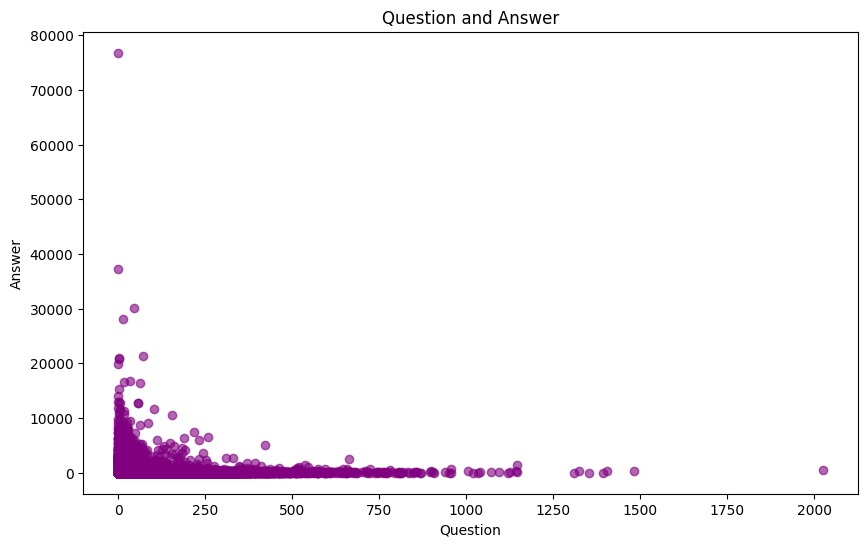

In [12]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_user_qna['q_id'], df_user_qna['a_id'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [16]:
df_user_qna

,id,creationdate,displayname,lastaccessdate,date,q_id,a_id
0,2631958,2013-07-29 21:47:53.560,0x92,2023-11-19 23:52:42.237,2013-07-29,0.0,1.0
1,2632614,2013-07-30 04:32:23.903,Matthew,2013-09-18 04:08:26.650,2013-07-30,0.0,0.0
2,2630622,2013-07-29 14:11:57.907,kalpesh,2013-07-29 14:11:57.907,2013-07-29,0.0,0.0
3,2631186,2013-07-29 16:58:12.260,Ming,2020-07-03 04:36:19.750,2013-07-29,0.0,0.0
4,2626616,2013-07-27 23:35:04.727,Dasha,2023-10-12 15:01:02.957,2013-07-27,0.0,0.0
...,...,...,...,...,...,...,...
21608158,2649085,2013-08-03 17:28:38.643,Mike,2013-09-04 20:01:40.573,2013-08-03,0.0,0.0
21608159,2649238,2013-08-03 19:14:56.930,ahmet,2013-08-14 18:23:15.803,2013-08-03,0.0,0.0
21608160,2646899,2013-08-02 17:42:35.557,Larry,2021-02-11 18:11:35.503,2013-08-02,0.0,0.0
21608161,2642394,2013-08-01 14:00:07.360,Ramalho,2013-11-16 18:51:11.113,2013-08-01,0.0,0.0


In [17]:
df_user_qna['gpt_af_yn'] = np.where(df_user_qna['date'] >= datetime.date(2022,11,30), 1, 0)

In [18]:
df_user_qna

,id,creationdate,displayname,lastaccessdate,date,q_id,a_id,gpt_af_yn
0,2631958,2013-07-29 21:47:53.560,0x92,2023-11-19 23:52:42.237,2013-07-29,0.0,1.0,0
1,2632614,2013-07-30 04:32:23.903,Matthew,2013-09-18 04:08:26.650,2013-07-30,0.0,0.0,0
2,2630622,2013-07-29 14:11:57.907,kalpesh,2013-07-29 14:11:57.907,2013-07-29,0.0,0.0,0
3,2631186,2013-07-29 16:58:12.260,Ming,2020-07-03 04:36:19.750,2013-07-29,0.0,0.0,0
4,2626616,2013-07-27 23:35:04.727,Dasha,2023-10-12 15:01:02.957,2013-07-27,0.0,0.0,0
...,...,...,...,...,...,...,...,...
21608158,2649085,2013-08-03 17:28:38.643,Mike,2013-09-04 20:01:40.573,2013-08-03,0.0,0.0,0
21608159,2649238,2013-08-03 19:14:56.930,ahmet,2013-08-14 18:23:15.803,2013-08-03,0.0,0.0,0
21608160,2646899,2013-08-02 17:42:35.557,Larry,2021-02-11 18:11:35.503,2013-08-02,0.0,0.0,0
21608161,2642394,2013-08-01 14:00:07.360,Ramalho,2013-11-16 18:51:11.113,2013-08-01,0.0,0.0,0


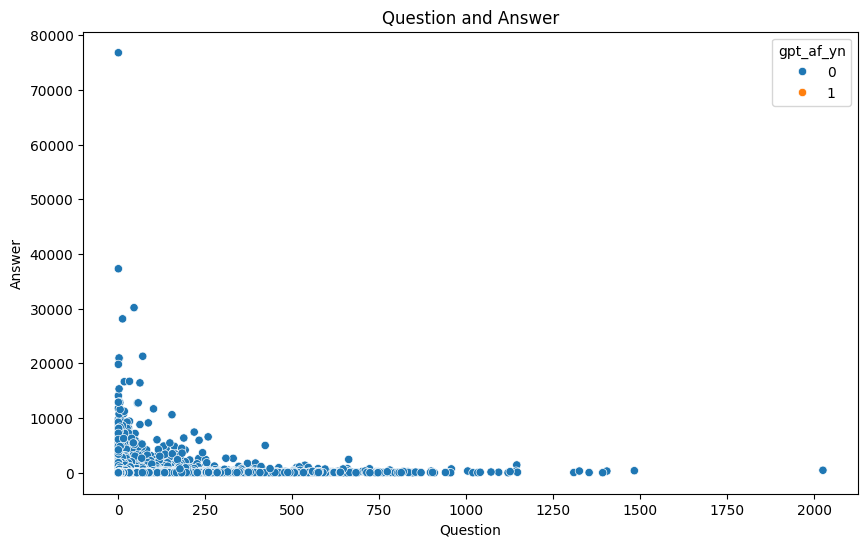

In [17]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' )

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [19]:
df_user_qna_bf = df_user_qna[(df_user_qna['creationdate'] >= '2021-11-30') &(df_user_qna['creationdate'] < '2022-11-30') ]

In [20]:
df_user_qna_af = df_user_qna[(df_user_qna['creationdate'] >= '2022-11-30') &(df_user_qna['creationdate'] < '2023-11-30') ]

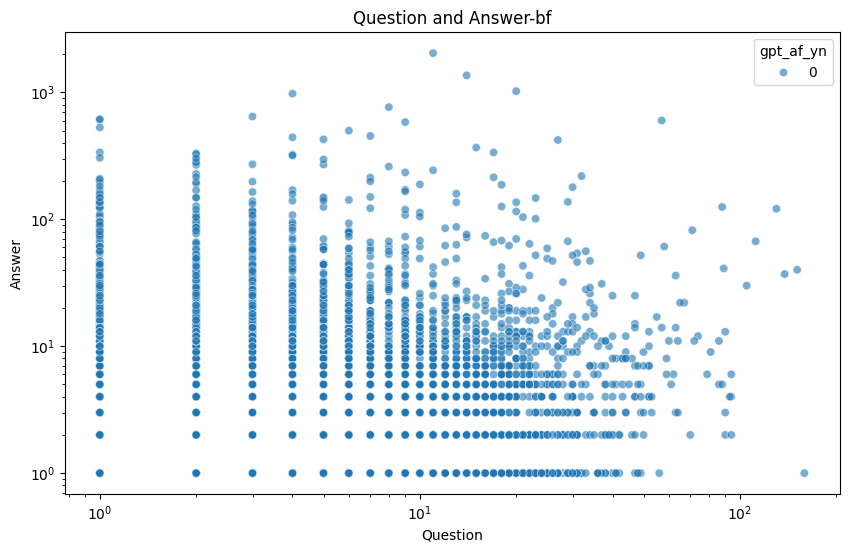

In [27]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna_bf, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' , color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer-bf')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')
ax.set_yscale('log')
ax.set_xscale('log')

plt.show();



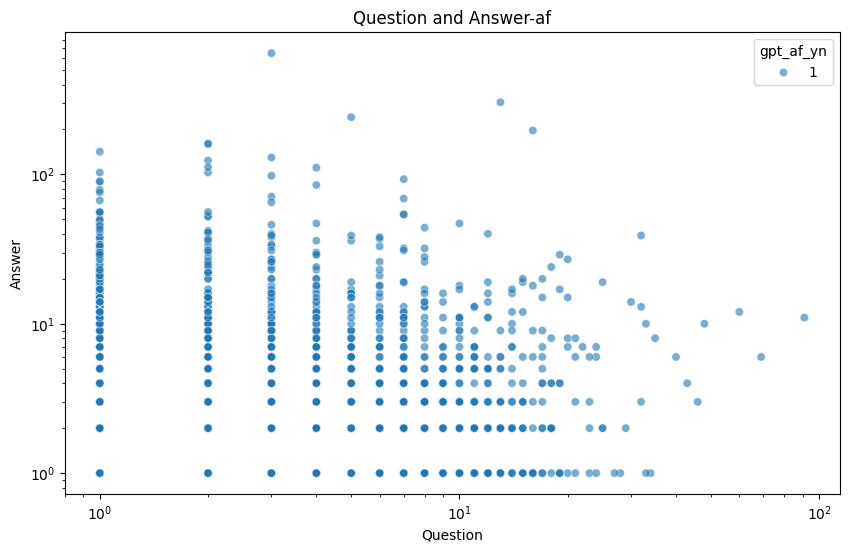

In [28]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna_af, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' , color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer-af')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')
ax.set_yscale('log')
ax.set_xscale('log')

plt.show();



In [22]:
df_user_qna_bf

,id,creationdate,displayname,lastaccessdate,date,q_id,a_id,gpt_af_yn
1973771,-1008,2022-01-31 19:45:27.477,Twilio,2022-01-31 19:45:27.477,2022-01-31,0.0,0.0,0
1973874,-1011,2022-11-09 20:49:03.637,AWS,2022-11-09 20:49:03.637,2022-11-09,0.0,0.0,0
1973875,-1010,2022-10-25 19:18:31.537,Microsoft Azure,2022-10-25 19:18:31.537,2022-10-25,0.0,0.0,0
1973876,-1009,2022-05-17 15:06:54.890,WSO2,2022-05-17 15:06:54.890,2022-05-17,0.0,0.0,0
2241016,22764280,2021-12-04 21:13:46.747,cadelow,2023-12-02 19:12:40.590,2021-12-04,0.0,0.0,0
...,...,...,...,...,...,...,...,...
21601539,17550562,2021-11-30 09:14:25.630,ALTS,2022-10-10 14:30:22.777,2021-11-30,0.0,0.0,0
21601540,17548321,2021-11-30 03:58:43.743,Kirairu,2022-02-05 14:36:44.880,2021-11-30,0.0,0.0,0
21601541,17548652,2021-11-30 04:52:31.613,The_B3_,2021-12-16 21:18:18.760,2021-11-30,0.0,0.0,0
21601542,17549041,2021-11-30 05:51:25.313,Manh,2022-04-07 09:28:43.610,2021-11-30,0.0,0.0,0


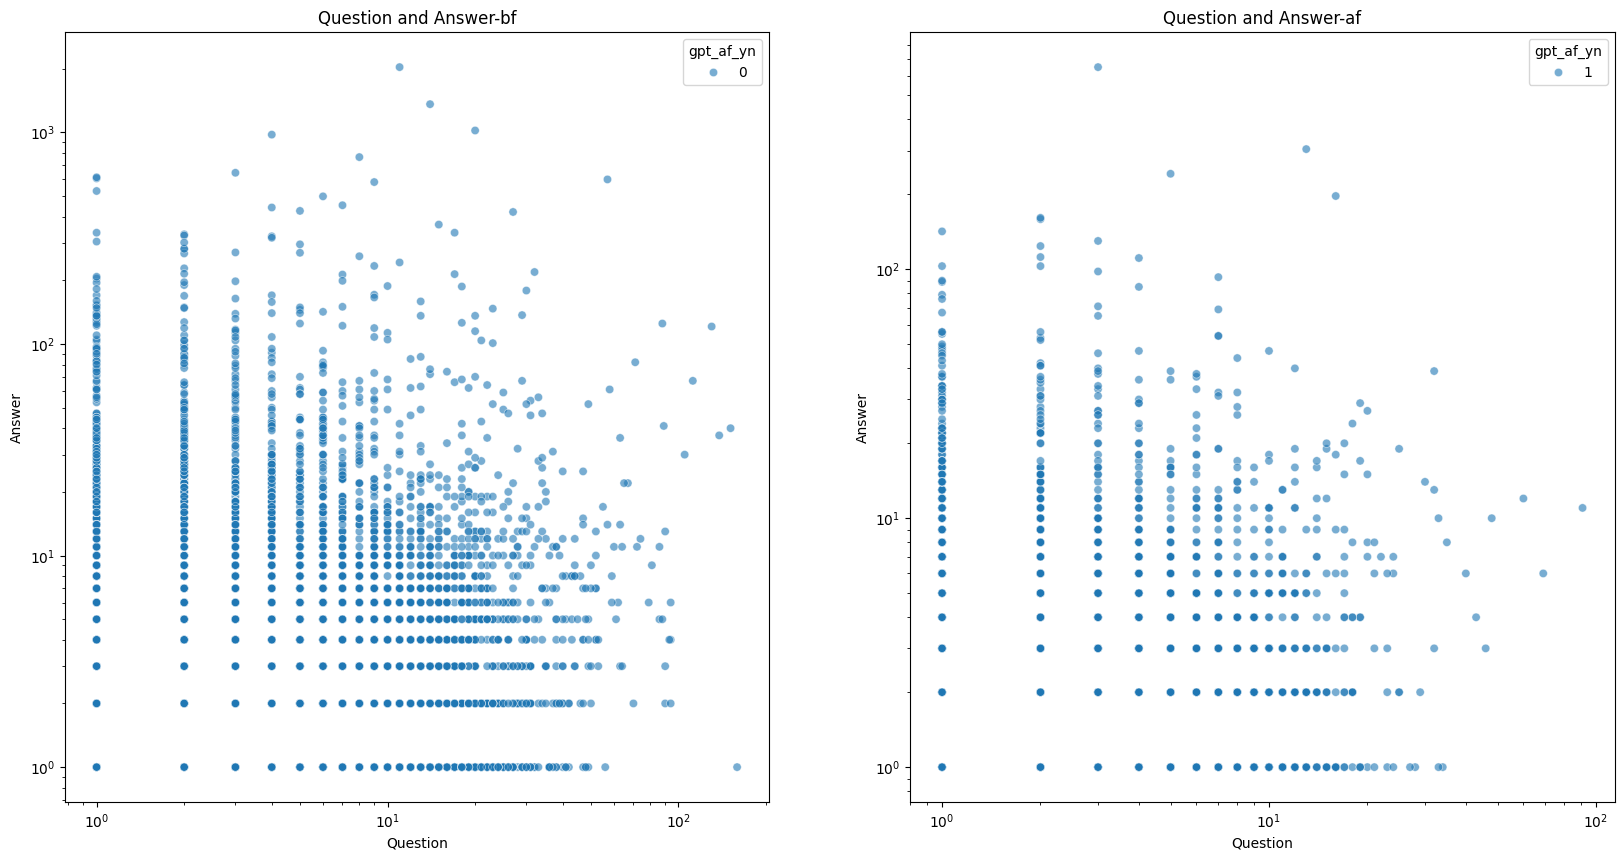

In [24]:
fig_scatter_reg, axes = plt.subplots(ncols=2, figsize = (20, 10))
sns.scatterplot(data = df_user_qna_bf, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' , color = 'purple', alpha = 0.6
                , ax = axes[0])

sns.scatterplot(data = df_user_qna_af, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' , color = 'purple', alpha = 0.6
                , ax = axes[1])


axes[0].set_title('Question and Answer-bf')
axes[0].set_xlabel('Question')
axes[0].set_ylabel('Answer')
axes[0].set_yscale('log')
axes[0].set_xscale('log')


axes[1].set_title('Question and Answer-af')
axes[1].set_xlabel('Question')
axes[1].set_ylabel('Answer')
axes[1].set_yscale('log')
axes[1].set_xscale('log')

plt.show();



무언가 이상한걸 감지함... 
가입 이후  포스트를 작성한 기간이 동일 하지 않음 이슈... 
맞추고 가보자 300일로 

In [30]:
df_usr_bf = df_user[(df_user['creationdate']>='2021-12-01') & (df_user['creationdate']<='2021-12-31') ]
df_usr_af = df_user[(df_user['creationdate']>='2022-12-01') & (df_user['creationdate']<='2022-12-31') ]

In [61]:
df_body = df_body[['id', 'creationdate', 'posttypeid', 'owneruserid']]


KeyError: "['id', 'creationdate', 'owneruserid'] not in index"

In [64]:
df_body = df_body[df_body['posttypeid'].isin(['1', '2'])]

In [79]:
df_body.columns = ['p_id', 'p_creationdate', 'posttypeid', 'p_owneruserid']

In [80]:
df_usr_bf_post = pd.merge(df_usr_bf, df_body, left_on = 'id', right_on = 'p_owneruserid', how='left')
df_usr_af_post = pd.merge(df_usr_af, df_body, left_on = 'id', right_on = 'p_owneruserid', how='left')

In [81]:
df_usr_bf_post['diff_days'] = df_usr_bf_post['p_creationdate'] - df_usr_bf_post['creationdate']
df_usr_af_post['diff_days'] = df_usr_af_post['p_creationdate'] - df_usr_af_post['creationdate']

In [82]:
df_usr_bf_post = df_usr_bf_post[df_usr_bf_post['diff_days'].dt.days <300]
df_usr_af_post = df_usr_af_post[df_usr_af_post['diff_days'].dt.days <300]

In [83]:
df_usr_bf_post = df_usr_bf_post.groupby(['id', 'posttypeid']).count()['p_id'].reset_index()
df_usr_af_post = df_usr_af_post.groupby(['id', 'posttypeid']).count()['p_id'].reset_index()

In [84]:
df_usr_bf_post = df_usr_bf_post.pivot_table(index = 'id', columns =  'posttypeid', values = 'p_id').reset_index()
df_usr_af_post = df_usr_af_post.pivot_table(index = 'id', columns =  'posttypeid', values = 'p_id').reset_index()

In [85]:
df_usr_bf_post = df_usr_bf_post.fillna(0)
df_usr_af_post = df_usr_af_post.fillna(0)

In [86]:
df_usr_bf_post

posttypeid,id,1,2
0,17556960,1.0,0.0
1,17556961,0.0,3.0
2,17556966,1.0,0.0
3,17556968,1.0,0.0
4,17556977,1.0,0.0
...,...,...,...
25706,17800353,1.0,0.0
25707,18032804,2.0,0.0
25708,18203720,10.0,0.0
25709,21370799,14.0,9.0


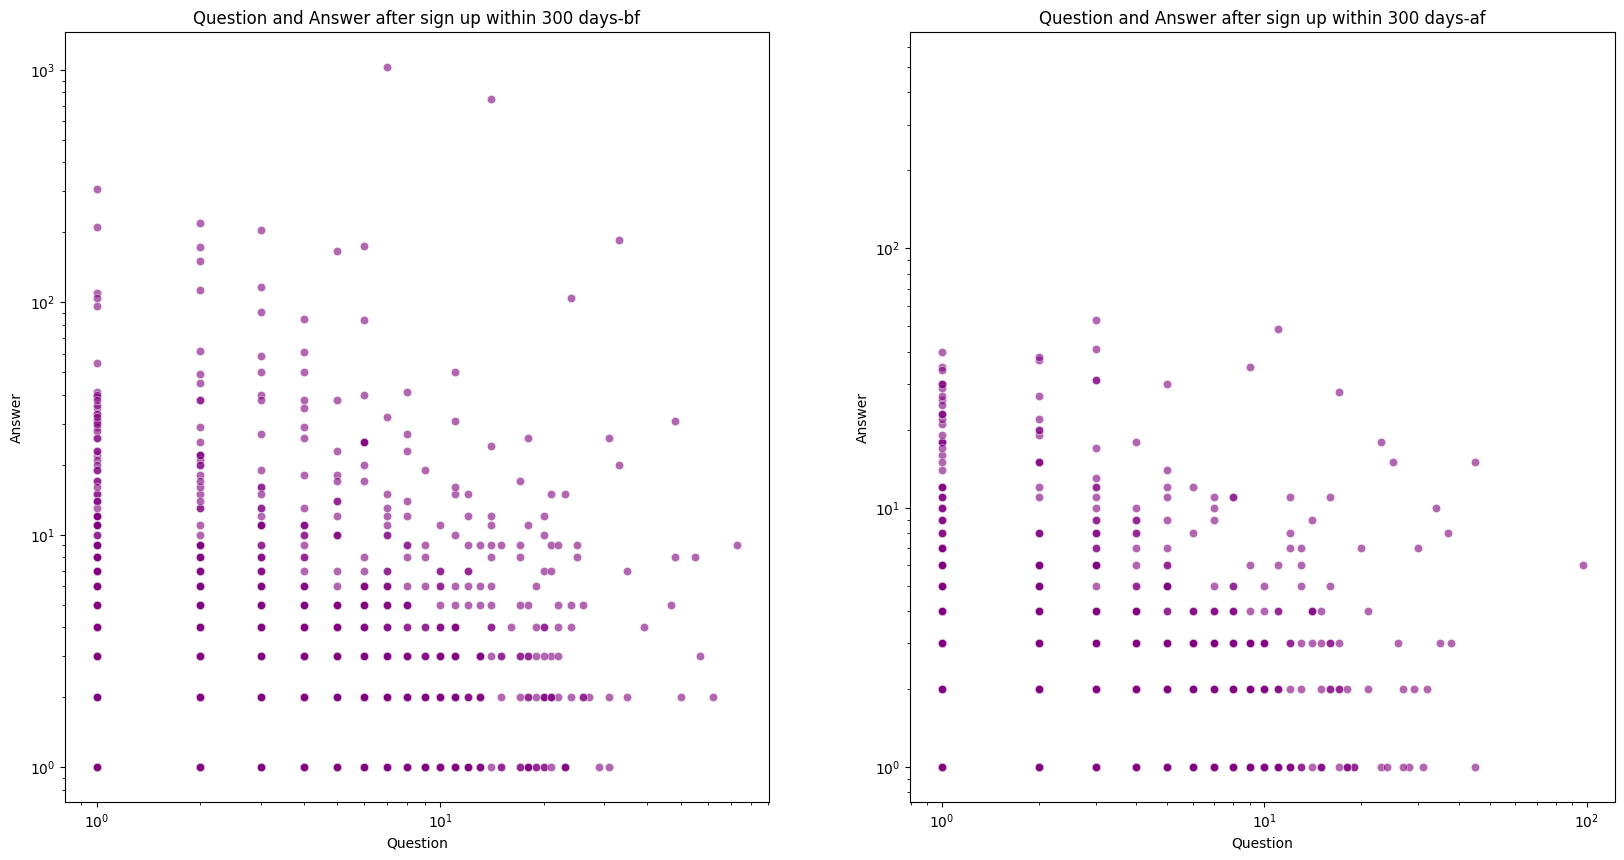

: 

In [89]:
fig_scatter_reg, axes = plt.subplots(ncols=2, figsize = (20, 10))
sns.scatterplot(data = df_usr_bf_post, x = '1', y = '2', color = 'purple', alpha = 0.6
                , ax = axes[0])

sns.scatterplot(data = df_usr_af_post, x = '1', y = '2', color = 'purple', alpha = 0.6
                , ax = axes[1])


axes[0].set_title('Question and Answer after sign up within 300 days-bf')
axes[0].set_xlabel('Question')
axes[0].set_ylabel('Answer')
axes[0].set_yscale('log')
axes[0].set_xscale('log')


axes[1].set_title('Question and Answer after sign up within 300 days-af')
axes[1].set_xlabel('Question')
axes[1].set_ylabel('Answer')
axes[1].set_yscale('log')
axes[1].set_xscale('log')

plt.show();



아니 혼자 7만건은 좀 너무한거 아닙니까...ㅎㅎㅎㅎㅎ

In [ ]:
df_q_1144035 = df_da.loc[df_da['a_owneruserid'] == 1144035, ['q_id', 'a_creationdate']]

In [ ]:
df_q_1144035 = df_q_1144035[['q_id', 'a_creationdate']].drop_duplicates()

In [ ]:
df_q_1144035['date'] = df_q_1144035['a_creationdate'].dt.date

In [ ]:
df_q_1144035

In [ ]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_q_1144035['date'], df_q_1144035['q_id'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [ ]:
df_q_1144035['date'].max()

In [ ]:
df_q_1144035.groupby('date').count()[['q_id']].sort_values(by = ['date'])

### Number of Posts after n years from signup

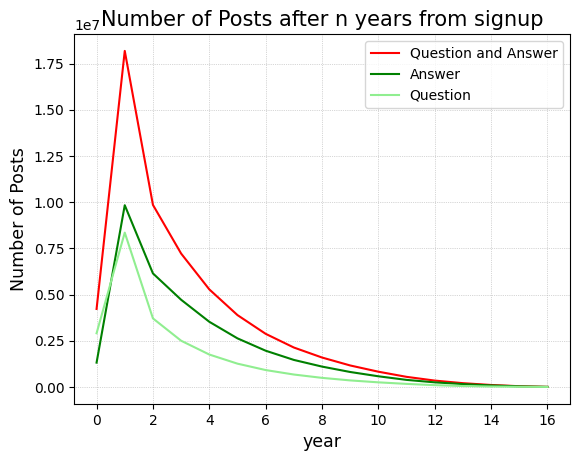

In [30]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna.loc[df_year_from_signup_qna['yeardiff']>=0, :].yeardiff.values ,
        df_year_from_signup_qna.loc[df_year_from_signup_qna['yeardiff']>=0, 'cnt'].values, # specify data
        color = 'red',
        label = 'Question and Answer'
) 


ax.plot(df_year_from_signup_qna.loc[df_year_from_signup_qna['yeardiff']>=0, :].yeardiff.values ,
        df_year_from_signup_a.loc[df_year_from_signup_a['yeardiff']>=0, 'cnt'].values, # specify data
        color = 'green',
        label = 'Answer'
) 

ax.plot(df_year_from_signup_qna.loc[df_year_from_signup_qna['yeardiff']>=0, :].yeardiff.values ,
        df_year_from_signup_q.loc[df_year_from_signup_q['yeardiff']>=0, 'cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Question'
) 

# 

ax.set_title('Number of Posts after n years from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [28]:
df_year_from_signup_qna.loc[df_year_from_signup_qna['yeardiff']>0, :].yeardiff.values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

In [18]:
df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values
# ['mean_cnt']

array([Decimal('1.1694610687170988'), Decimal('6.1035138658231052'),
       Decimal('6.7678097725903294'), Decimal('6.6143812951156638'),
       Decimal('6.2706355316055085'), Decimal('5.9554522122198812'),
       Decimal('5.6700696650944327'), Decimal('5.4775094769932505'),
       Decimal('5.4027432056589229'), Decimal('5.3259167526659787'),
       Decimal('5.2684918716344985'), Decimal('5.2058119005582860'),
       Decimal('5.5068743390058648'), Decimal('6.1495202639305064'),
       Decimal('6.6549380755795491'), Decimal('6.8955567357054346'),
       Decimal('4.8009331259720062')], dtype=object)

### Average Number of Posts after n year from sign up

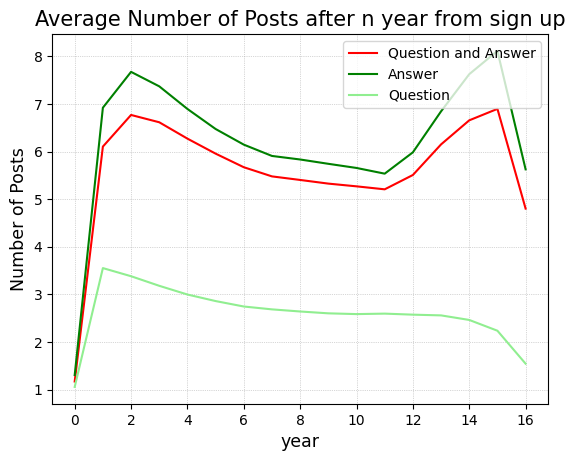

In [27]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'red',
        label = 'Question and Answer'
) 

        
ax.plot(df_year_from_signup_a_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Answer'
) 

ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Question'
) 

# 

ax.set_title('Average Number of Posts after n year from sign up', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Number of Unique Users per Post after n years from signup

In [20]:
df_year_from_signup_cnt = df_year_from_signup_cnt[df_year_from_signup_cnt['yeardiff'] >=0]

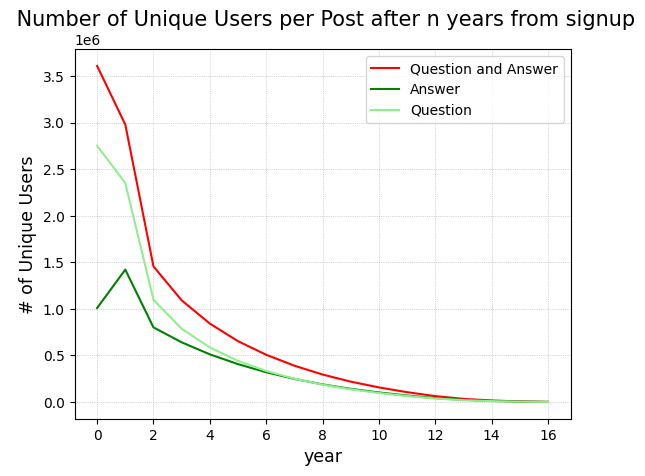

In [21]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_cnt.sort_values(by = ['yeardiff'])['tot_usr_cnt'].values, # specify data
        color = 'red',
        label = 'Question and Answer'
) 


ax.plot(df_year_from_signup_cnt.sort_values(by = ['yeardiff'])['a_usr_cnt'].values, # specify data
        color = 'green',
        label = 'Answer'
)


ax.plot(df_year_from_signup_cnt.sort_values(by = ['yeardiff'])['q_usr_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Question'
) 



ax.set_title(' Number of Unique Users per Post after n years from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('# of Unique Users', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

NameError: name 'df_year_from_signup_cnt_over8' is not defined

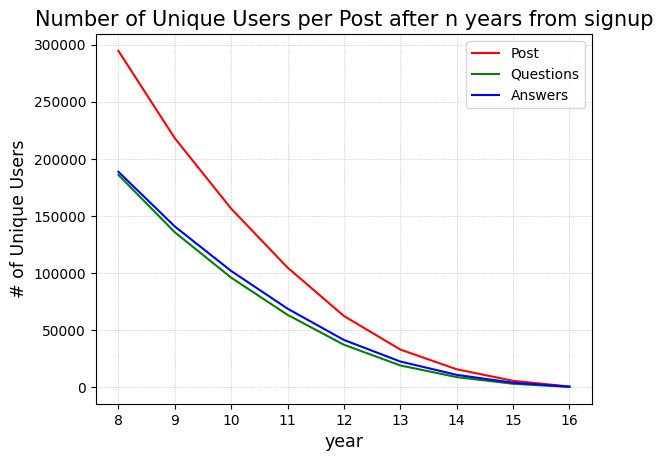

In [23]:
fig, ax = plt.subplots()


df_year_from_signup_cnt_over8 = df_year_from_signup_cnt[df_year_from_signup_cnt['yeardiff']>=8]
ax.plot(df_year_from_signup_cnt_over8.yeardiff.values, 
        df_year_from_signup_cnt_over8.sort_values(by = ['yeardiff'])['tot_usr_cnt'].values, # specify data
        color = 'red',
        label = 'Post'
) 


ax.plot(df_year_from_signup_cnt_over8.yeardiff.values,
        df_year_from_signup_cnt_over8.sort_values(by = ['yeardiff'])['q_usr_cnt'].values, # specify data
        color = 'green',
        label = 'Questions'
) 

ax.plot(df_year_from_signup_cnt_over8.yeardiff.values,
        df_year_from_signup_cnt_over8.sort_values(by = ['yeardiff'])['a_usr_cnt'].values, # specify data
        color = 'blue',
        label = 'Answers'
) 



ax.set_title('Number of Unique Users per Post after n years from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('# of Unique Users', fontsize = 12.5) # y-axis label
ax.set_xticks(np.arange(8, 17))

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Median Number of Posts after year from signup

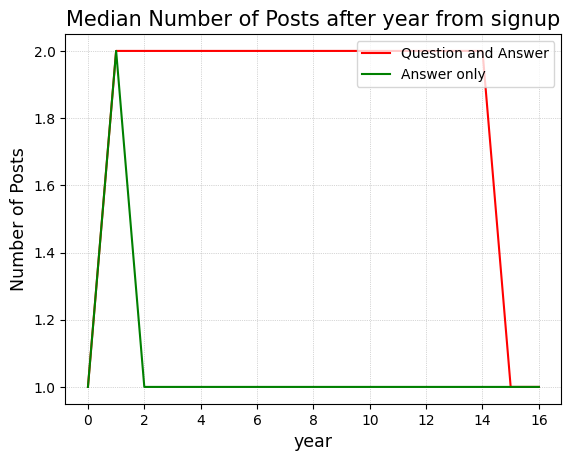

In [24]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'red',
        label = 'Question and Answer'
) 


ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'green',
        label = 'Answer only'
) 

# ax.plot(df_year_from_signup_a_mm['med_cnt'].values, # specify data
#         color = 'lightgreen',
#         label = 'Question only'
# ) 

# 

ax.set_title('Median Number of Posts after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Comparing Median/Average Number of Posts after year from signup

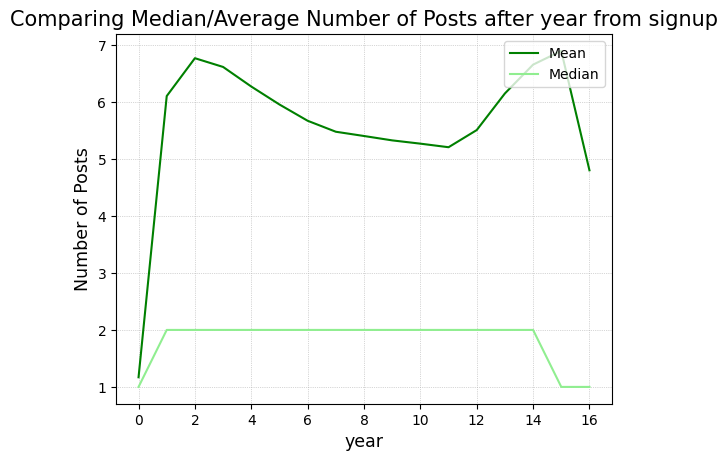

In [25]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 




ax.plot(df_year_from_signup_qna_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Median'
)




ax.set_title('Comparing Median/Average Number of Posts after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Comparing Median/Average Number of Questions after year from signup

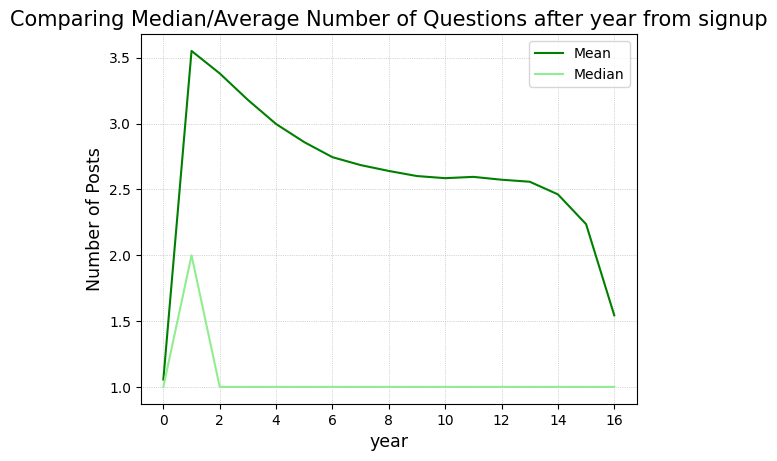

In [26]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 

ax.plot(df_year_from_signup_q_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Median'
) 



ax.set_title('Comparing Median/Average Number of Questions after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Comparing Median/Average Number of Answers after year from signup

In [ ]:
fig, ax = plt.subplots()


ax.plot(df_year_from_signup_a_mm.sort_values(by = ['yeardiff'])['mean_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 

ax.plot(df_year_from_signup_a_mm.sort_values(by = ['yeardiff'])['med_cnt'].values, # specify data
        color = 'lightgreen',
        label = 'Median'
) 



ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
df_year_gpt_yn = df_year_gpt_yn[df_year_gpt_yn['yeardiff']>=0]

In [ ]:
df_year_gpt_yn

In [ ]:
c_gpt_n = df_year_gpt_yn['c_gpt_yn'] ==0
c_gpt_y = df_year_gpt_yn['c_gpt_yn'] ==1 

u_c_gpt_n = df_year_gpt_yn['u_c_gpt_yn'] ==0
u_c_gpt_y = df_year_gpt_yn['u_c_gpt_yn'] ==1 

In [ ]:
df_year_gpt_yn.loc[c_gpt_n&u_c_gpt_n, 'q_cnt'].values


In [ ]:
fig, ax = plt.subplots()


ax.plot(df_year_gpt_yn.loc[c_gpt_n&u_c_gpt_n, 'q_cnt'].values, # specify data
        color = 'green',
        label = 'Mean'
) 

ax.plot(df_year_gpt_yn.loc[c_gpt_n&u_c_gpt_y, 'q_cnt'].values, # specify data
        color = 'orange',
        label = 'Median'
) 

ax.plot(df_year_gpt_yn.loc[c_gpt_y&u_c_gpt_n, 'q_cnt'].values, # specify data
        color = 'pink',
        label = 'Median'
) 

ax.plot(df_year_gpt_yn.loc[c_gpt_y&u_c_gpt_y, 'q_cnt'].values, # specify data
        color = 'lightblue',
        label = 'Median'
) 



ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [29]:
df_usr_post_cre_avg_med.sort_values(by  = ['usr_creationyear', 'post_creationyear'])

,usr_creationyear,post_creationyear,avg_post_cnt,med_post_cnt
32,2008,2013,7.4596319245352816,0E-20
97,2008,2014,5.4136687320817534,0E-20
89,2008,2015,4.1688708036622584,0E-20
115,2008,2016,3.4425691297512254,0E-20
81,2008,2017,2.9247202441505595,0E-20
...,...,...,...,...
23,2021,2022,0.13814605068349098648,0E-20
7,2021,2023,0.05982005661358230184,0E-20
38,2022,2022,0.21210766974602804320,0E-20
101,2022,2023,0.07478569191271196547,0E-20


In [30]:
df_usr_post_cre_avg_med[df_usr_post_cre_avg_med['usr_creationyear'] =='2010']

,usr_creationyear,post_creationyear,avg_post_cnt,med_post_cnt
0,2010,2019,0.64851599549875411944,0E-20
8,2010,2018,0.78619584438549955791,0E-20
22,2010,2021,0.48038240495137046861,0E-20
28,2010,2017,1.0103086568603810,0E-20
31,2010,2022,0.40641829434932883209,0E-20
34,2010,2016,1.3093350614902339,0E-20
48,2010,2014,2.1747196768748493,0E-20
59,2010,2020,0.60451832650108512177,0E-20
64,2010,2013,2.9901133349409211,0E-20
66,2010,2015,1.6821999839241219,0E-20


In [31]:
df_diff_usrcre_avg_med = df_diff_usrcre_avg_med.sort_values(by = ['usr_creationyear', 'yeardiff'])

In [32]:
df_diff_usrcre_avg_med.head()

,yeardiff,usr_creationyear,avg_cnt,med_cnt
128,0.0,2008,2.2150094996833439,1.00000000000000000000
86,1.0,2008,33.5873763038245520,10.0000000000000000
123,2.0,2008,30.7345577211394303,7.0000000000000000
34,3.0,2008,28.1061071873701703,6.0000000000000000
15,4.0,2008,22.7998296422487223,5.0000000000000000


### Comparing Average Number of Posts per Cohort after year from signup

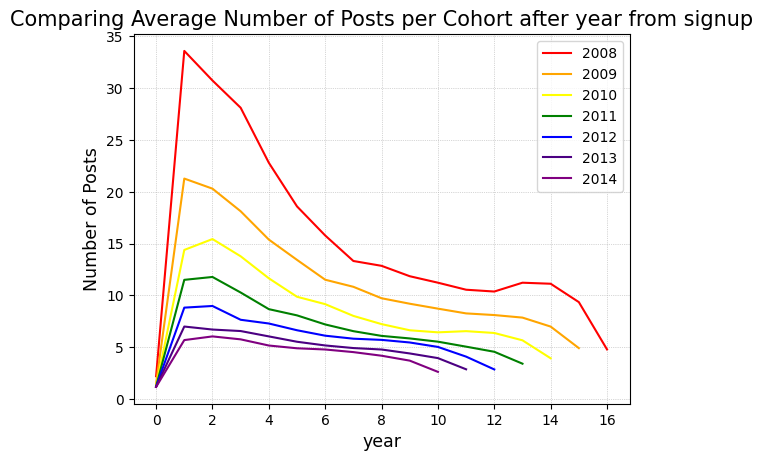

In [33]:
year_list = [str(x) for x in np.arange(2008, 2008+7)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(0, 7):    
        ax.plot(df_diff_usrcre_avg_med.loc[df_diff_usrcre_avg_med['usr_creationyear']==year_list[i], ['avg_cnt']].values, # specify data
                color = color_list[i],
                label = year_list[i]
        ) 

ax.set_title('Comparing Average Number of Posts per Cohort after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();
# 08년 집단이 왜이렇게 강력한가 
# 2008년부터 2014년까지의 코호트는 모두 비슷하게 1 2년차에 가장 활동을 활발하게 하고 갈수록 떨어진다

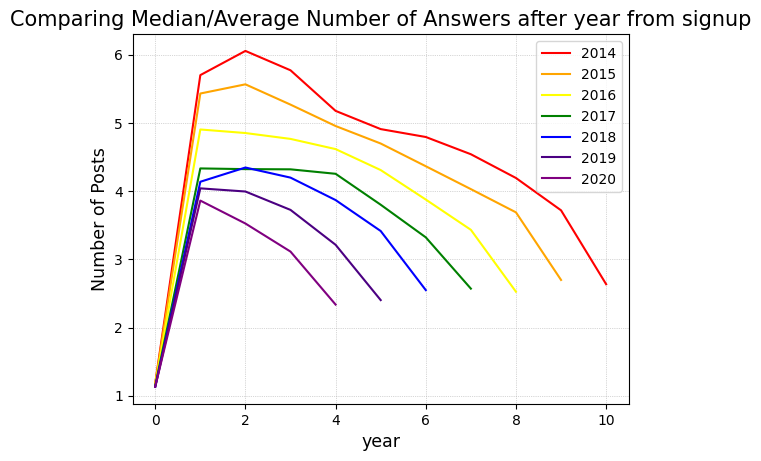

In [34]:
year_list = [str(x) for x in np.arange(2014, 2014+7)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(0, 7):    
        ax.plot(df_diff_usrcre_avg_med.loc[df_diff_usrcre_avg_med['usr_creationyear']==year_list[i], ['avg_cnt']].values, # specify data
                color = color_list[i],
                label = year_list[i]
        ) 

ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [96]:
df_diff_usrcre_avg_med

,yeardiff,usr_creationyear,avg_cnt,med_cnt
128,0.0,2008,2.2150094996833439,1.00000000000000000000
86,1.0,2008,33.5873763038245520,10.0000000000000000
123,2.0,2008,30.7345577211394303,7.0000000000000000
34,3.0,2008,28.1061071873701703,6.0000000000000000
15,4.0,2008,22.7998296422487223,5.0000000000000000
...,...,...,...,...
80,0.0,2022,1.1123804244741708,1.00000000000000000000
42,1.0,2022,3.0528015419470463,1.00000000000000000000
13,2.0,2022,2.2442212518195051,1.00000000000000000000
79,0.0,2023,1.0701322089462106,1.00000000000000000000


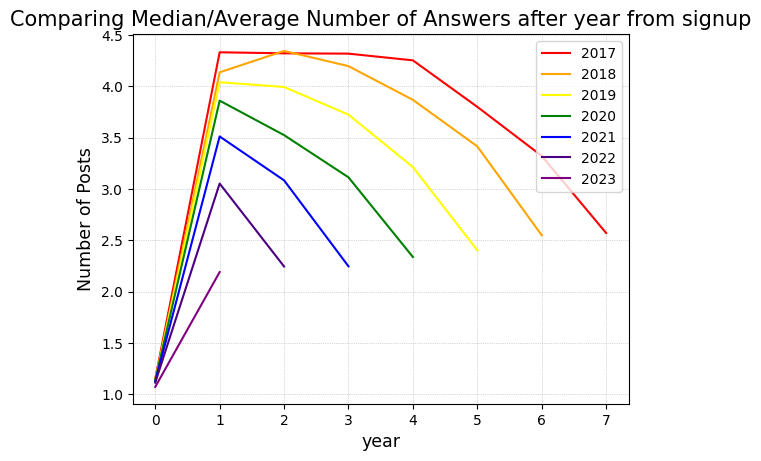

In [35]:
year_list = [str(x) for x in np.arange(2017, 2017+7)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(0, 7):    
        ax.plot(df_diff_usrcre_avg_med.loc[df_diff_usrcre_avg_med['usr_creationyear']==year_list[i], ['avg_cnt']].values, # specify data
                color = color_list[i],
                label = year_list[i]
        ) 

ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

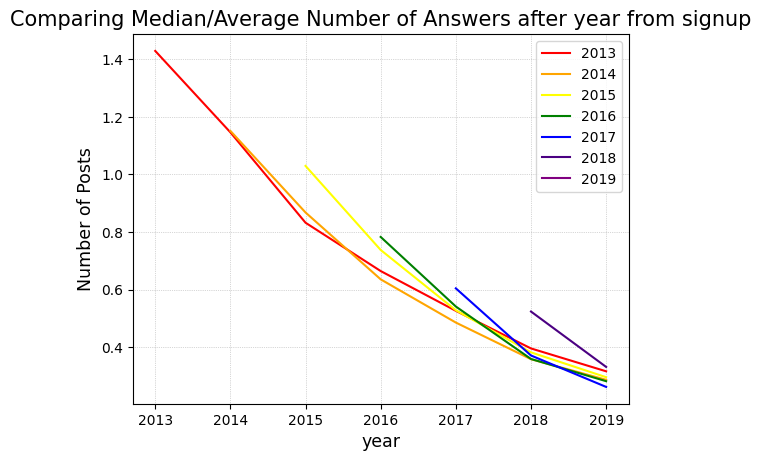

In [37]:
std_year = 2013
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_usr_post_cre_avg_med[df_usr_post_cre_avg_med['usr_creationyear']==year_list[i]].head(len(year_list[i:])).avg_post_cnt.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

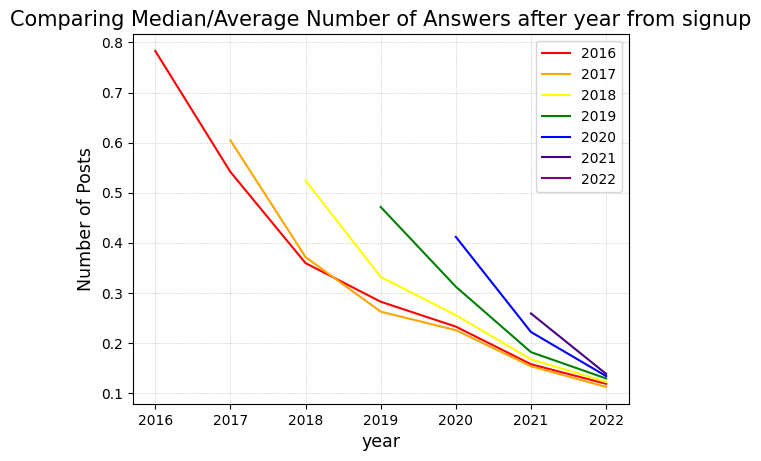

In [38]:
std_year = 2016
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_usr_post_cre_avg_med[df_usr_post_cre_avg_med['usr_creationyear']==year_list[i]].head(len(year_list[i:])).avg_post_cnt.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Average number of posts by cohort

In [35]:
df_usr_post_cre_avg_med = df_usr_post_cre_avg_med.sort_values(by = ['usr_creationyear', 'post_creationyear'])

In [38]:
df_usr_post_cre_avg_med

,usr_creationyear,post_creationyear,avg_post_cnt,med_post_cnt
32,2008,2013,7.4596319245352816,0E-20
97,2008,2014,5.4136687320817534,0E-20
89,2008,2015,4.1688708036622584,0E-20
115,2008,2016,3.4425691297512254,0E-20
81,2008,2017,2.9247202441505595,0E-20
...,...,...,...,...
23,2021,2022,0.13814605068349098648,0E-20
7,2021,2023,0.05982005661358230184,0E-20
38,2022,2022,0.21210766974602804320,0E-20
101,2022,2023,0.07478569191271196547,0E-20


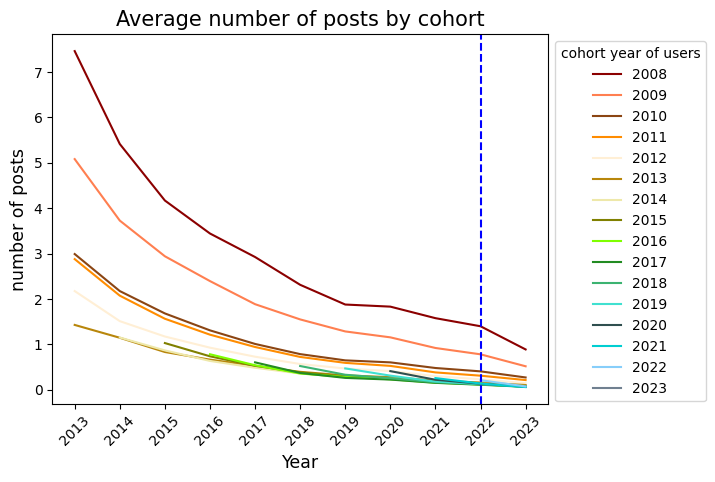

In [43]:
fig, ax = plt.subplots()

year_list = [str(x) for x in np.arange(2008, 2024)]

for idx in range(len(year_list)) :
  ax.plot(df_usr_post_cre_avg_med.loc[df_usr_post_cre_avg_med['usr_creationyear'] == year_list[idx], 'post_creationyear']
      ,  df_usr_post_cre_avg_med.loc[df_usr_post_cre_avg_med['usr_creationyear'] == year_list[idx], 'avg_post_cnt']
      ,  color=color_list[20+(idx*6)]
      , label = year_list[idx]
        ) # hist type


ax.set_title('Average number of posts by cohort', fontsize = 15) # title
ax.set_xlabel('Year', fontsize = 12.5) # x-axis label
ax.set_ylabel('number of posts', fontsize = 12.5) # y-axis label

ax.legend(title = "cohort year of users",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )

ax.axvline('2022', # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)


plt.xticks(rotation=45)
plt.show();

In [ ]:
# df_usr_post_cre_cnt_pivot.sort_values(by = ['usr_creationyear', 'postcreationyear'])
df_usr_a_cre_avg_med = df_usr_a_cre_avg_med.sort_values(by = ['usr_creationyear', 'a_creationyear'])
df_usr_q_cre_avg_med = df_usr_q_cre_avg_med.sort_values(by = ['usr_creationyear', 'q_creationyear'])

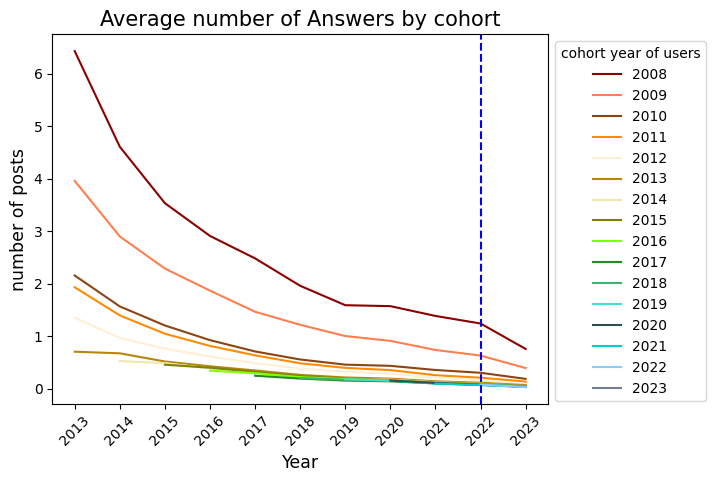

In [53]:
fig, ax = plt.subplots()

year_list = [str(x) for x in np.arange(2008, 2024)]

for idx in range(len(year_list)) :
  ax.plot(df_usr_a_cre_avg_med.loc[df_usr_a_cre_avg_med['usr_creationyear'] == year_list[idx], 'a_creationyear']
       ,  df_usr_a_cre_avg_med.loc[df_usr_a_cre_avg_med['usr_creationyear'] == year_list[idx], 'avg_post_cnt']
       ,  color=color_list[20+(idx*6)]
      , label = year_list[idx]
        ) # hist type


ax.set_title('Average number of Answers by cohort', fontsize = 15) # title
ax.set_xlabel('Year', fontsize = 12.5) # x-axis label
ax.set_ylabel('number of posts', fontsize = 12.5) # y-axis label

ax.legend(title = "cohort year of users",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )

ax.axvline('2022', # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)


plt.xticks(rotation=45)
plt.show();

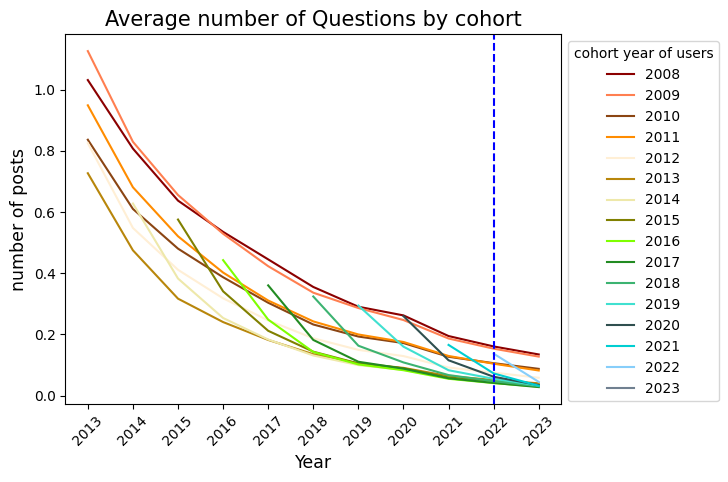

In [54]:
fig, ax = plt.subplots()

year_list = [str(x) for x in np.arange(2008, 2024)]

for idx in range(len(year_list)) :
  ax.plot(df_usr_q_cre_avg_med.loc[df_usr_q_cre_avg_med['usr_creationyear'] == year_list[idx], 'q_creationyear']
       ,  df_usr_q_cre_avg_med.loc[df_usr_q_cre_avg_med['usr_creationyear'] == year_list[idx], 'avg_post_cnt']
       ,  color=color_list[20+(idx*6)]
      , label = year_list[idx]
        ) # hist type


ax.set_title('Average number of Questions by cohort', fontsize = 15) # title
ax.set_xlabel('Year', fontsize = 12.5) # x-axis label
ax.set_ylabel('number of posts', fontsize = 12.5) # y-axis label

ax.legend(title = "cohort year of users",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )

ax.axvline('2022', # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)


plt.xticks(rotation=45)
plt.show();

In [39]:
df_no_post_per_year['post_n_usr_cnt'] = df_no_post_per_year['usr_cnt'] - df_no_post_per_year['post_y_usr_cnt'] 

In [40]:
df_no_post_per_year = df_no_post_per_year.sort_values(by = ['usr_creationyear', 'postcreationyear'])

In [41]:
df_no_post_per_year

,usr_creationyear,postcreationyear,usr_cnt,post_y_usr_cnt,post_n_usr_cnt
11,2008,2013,21626,12584,9042
14,2008,2014,21626,13920,7706
12,2008,2015,21626,14795,6831
70,2008,2016,21626,15631,5995
22,2008,2017,21626,16301,5325
...,...,...,...,...,...
2,2021,2022,2783431,2671138,112293
86,2021,2023,2783431,2719448,63983
88,2022,2022,3052148,2738095,314053
55,2022,2023,3052148,2963613,88535


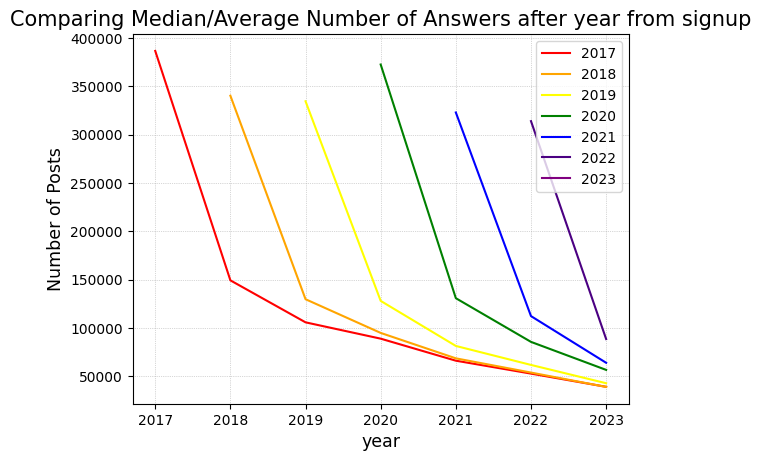

In [42]:
std_year = 2017
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_usr_cnt.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [43]:
df_no_post_per_year['post_n_rate'] = df_no_post_per_year['post_n_usr_cnt']/df_no_post_per_year['usr_cnt']*100

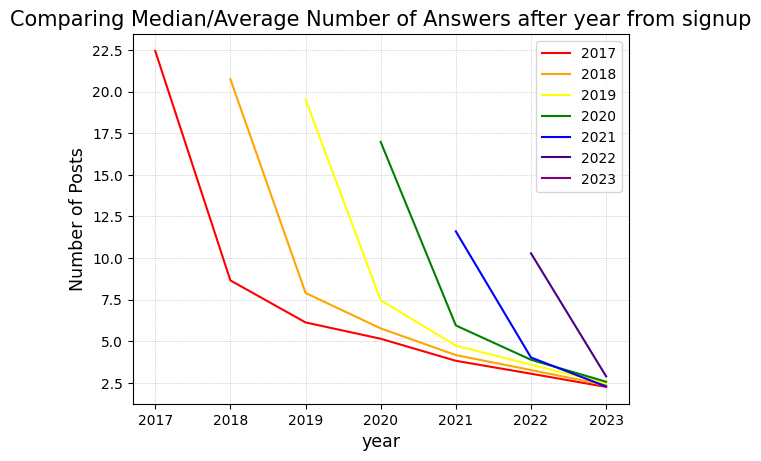

In [44]:
std_year = 2017
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_rate.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

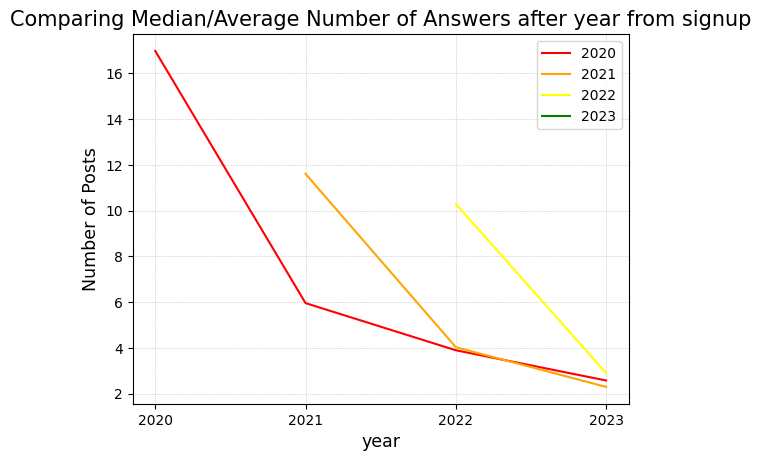

In [45]:
std_year = 2020
num_of_year = 4
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_rate.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [32]:
df_usr_post_cre_avg_med = df_usr_post_cre_avg_med.sort_values(by = ['usr_creationyear', 'post_creationyear'])

In [30]:
df_usr_post_cre_avg_med[df_usr_post_cre_avg_med['usr_creationyear']==year_list[i]].post_creationyear.values

array(['2020', '2021', '2013', '2023', '2019', '2018', '2017', '2022',
       '2015', '2014', '2016'], dtype=object)

### Number of answer over question by cohort

In [98]:
df_usr_post_cre_cnt

,usr_creationyear,posttypeid,postcreationyear,post_cnt
0,2008,1,2013,22312
1,2008,1,2014,17466
2,2008,1,2015,13788
3,2008,1,2016,11577
4,2008,1,2017,9632
...,...,...,...,...
237,2022,1,2023,136882
238,2022,2,2022,228520
239,2022,2,2023,91375
240,2023,1,2023,258924


In [99]:
df_usr_post_cre_cnt_pivot = df_usr_post_cre_cnt.pivot(index=['usr_creationyear', 'postcreationyear'], columns = 'posttypeid', values = 'post_cnt').reset_index()

In [114]:
# df_usr_post_cre_cnt_pivot
df_usr_post_cre_cnt_pivot['a_over_q'] = df_usr_post_cre_cnt_pivot['2']/df_usr_post_cre_cnt_pivot['1']

In [115]:
df_usr_post_cre_cnt_pivot.sort_values(by = ['usr_creationyear', 'postcreationyear'])

posttypeid,usr_creationyear,postcreationyear,1,2,a_over_q
0,2008,2013,22312,139010,6.230280
1,2008,2014,17466,99610,5.703080
2,2008,2015,13788,76368,5.538729
3,2008,2016,11577,62872,5.430768
4,2008,2017,9632,53618,5.566653
...,...,...,...,...,...
116,2021,2022,201956,182564,0.903979
117,2021,2023,89522,76983,0.859934
118,2022,2022,418864,228520,0.545571
119,2022,2023,136882,91375,0.667546


In [116]:
df_usr_post_cre_cnt_pivot.loc[df_usr_post_cre_cnt_pivot['usr_creationyear'] == '2008', 'a_over_q']

0     6.230280
1     5.703080
2     5.538729
3     5.430768
4     5.566653
5     5.511065
6     5.463558
7     5.985893
8     7.101614
9     7.709148
10    5.608247
Name: a_over_q, dtype: float64

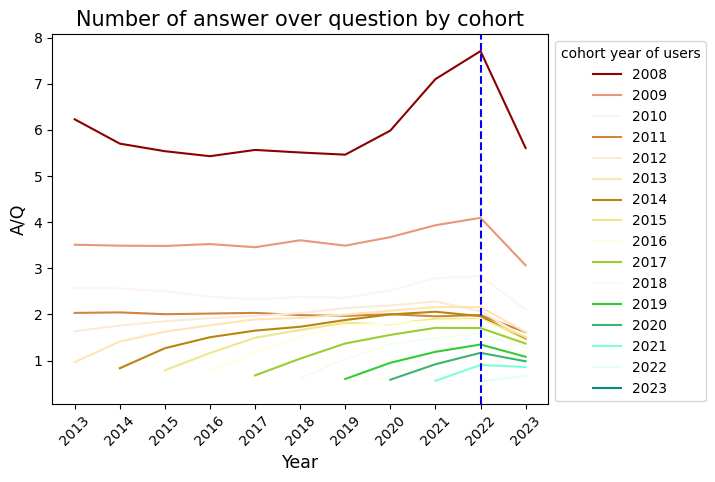

In [155]:
fig, ax = plt.subplots()

year_list = [str(x) for x in np.arange(2008, 2024)]

for idx in range(len(year_list)) :
  ax.plot(df_usr_post_cre_cnt_pivot.loc[df_usr_post_cre_cnt_pivot['usr_creationyear'] == year_list[idx], 'postcreationyear']
      ,  df_usr_post_cre_cnt_pivot.loc[df_usr_post_cre_cnt_pivot['usr_creationyear'] == year_list[idx], 'a_over_q']
      ,  color=color_list[20+(idx*5)]
      , label = year_list[idx]
        ) # hist type


# major_xticks = ['2022']

ax.set_title('Number of answer over question by cohort', fontsize = 15) # title
ax.set_xlabel('Year', fontsize = 12.5) # x-axis label
ax.set_ylabel('A/Q', fontsize = 12.5) # y-axis label

ax.legend(title = "cohort year of users",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )

ax.axvline('2022', # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)


plt.xticks(rotation=45)
plt.show();

In [47]:
df_no_post_per_year['post_n_pct_chg'] = df_no_post_per_year.groupby('usr_creationyear').post_n_usr_cnt.pct_change()

In [48]:
df_no_post_per_year= df_no_post_per_year.fillna(0)

In [49]:
df_no_post_per_year

,usr_creationyear,postcreationyear,usr_cnt,post_y_usr_cnt,post_n_usr_cnt,post_n_rate,post_n_pct_chg
11,2008,2013,21626,12584,9042,41.810783,0.000000
14,2008,2014,21626,13920,7706,35.633034,-0.147755
12,2008,2015,21626,14795,6831,31.586979,-0.113548
70,2008,2016,21626,15631,5995,27.721261,-0.122383
22,2008,2017,21626,16301,5325,24.623139,-0.111760
...,...,...,...,...,...,...,...
2,2021,2022,2783431,2671138,112293,4.034337,-0.652376
86,2021,2023,2783431,2719448,63983,2.298710,-0.430214
88,2022,2022,3052148,2738095,314053,10.289573,0.000000
55,2022,2023,3052148,2963613,88535,2.900744,-0.718089


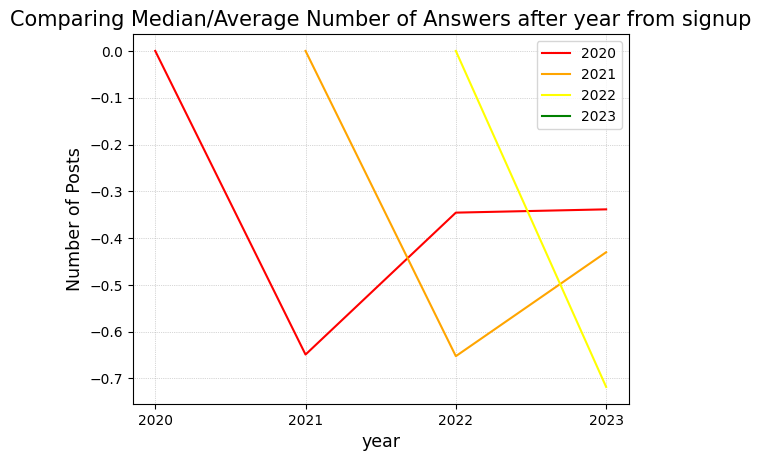

In [50]:
std_year = 2020
num_of_year = 4
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_pct_chg.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

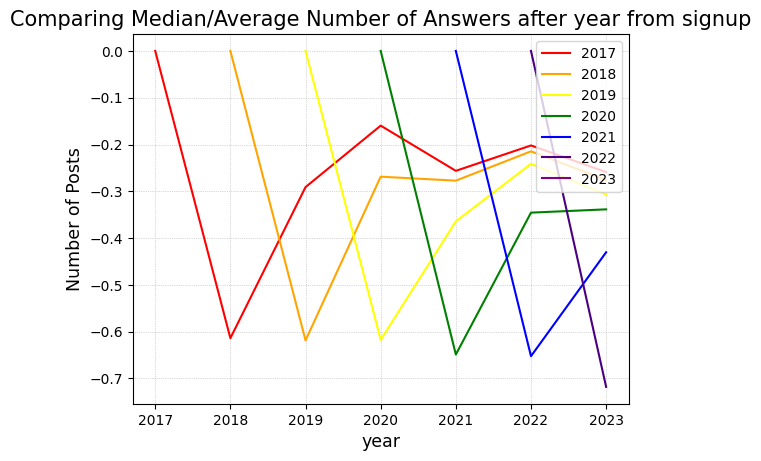

In [51]:
std_year = 2017
num_of_year = 7
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_pct_chg.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [52]:
df_no_post_per_year[df_no_post_per_year['usr_creationyear'] =='2022']

,usr_creationyear,postcreationyear,usr_cnt,post_y_usr_cnt,post_n_usr_cnt,post_n_rate,post_n_pct_chg
88,2022,2022,3052148,2738095,314053,10.289573,0.000000
55,2022,2023,3052148,2963613,88535,2.900744,-0.718089


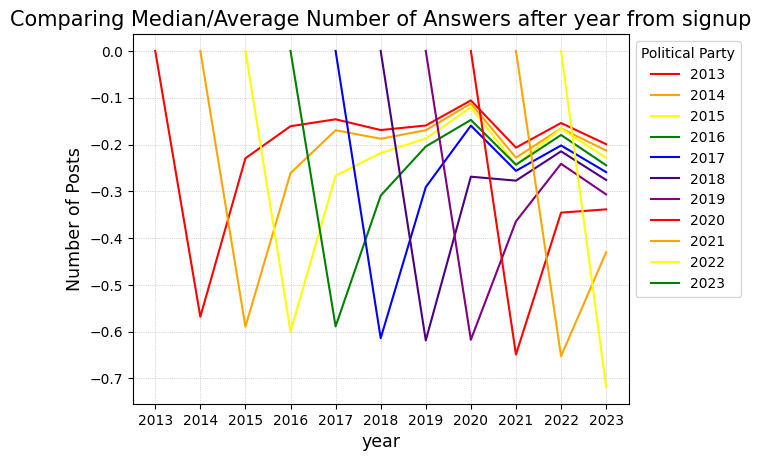

In [53]:
std_year = 2013
num_of_year = 11
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple'
            , 'red', 'orange', 'yellow', 'green']

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_pct_chg.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

# ax.legend(loc = 'upper right', fontsize = 10) # add legend
ax.legend(title = "Political Party",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )


ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [ ]:
std_year = 2013
num_of_year = 11
year_list = [str(x) for x in np.arange(std_year, std_year+num_of_year)]

fig, ax = plt.subplots()

for i in range(len(year_list)):   
        ax.plot (year_list[i:]
        , df_no_post_per_year[df_no_post_per_year['usr_creationyear']==year_list[i]].head(len(year_list[i:])).post_n_pct_chg.values
        ,  color = color_list[i]
        ,  label = year_list[i]
        ) 


ax.set_title('Comparing Median/Average Number of Answers after year from signup', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.set_xticks(year_list)
# axs[0].set_xticks(major_xticks)

# ax.legend(loc = 'upper right', fontsize = 10) # add legend
ax.legend(title = "Political Party",
          title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 1), 
          )


ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Number of Active Users per Year

In [54]:
df_active_usr_per_year_tot = df_active_usr_per_year.groupby(['yeardiff']).sum()['usr_cnt'].reset_index()

In [55]:
df_active_usr_per_year_tot = df_active_usr_per_year_tot.set_index(['yeardiff'])

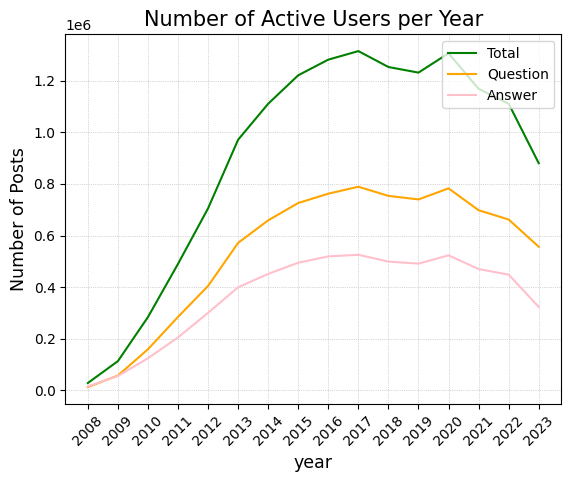

In [56]:
fig, ax = plt.subplots()


ax.plot( df_active_usr_per_year_tot.index, 
        df_active_usr_per_year_tot['usr_cnt'].values, # specify data
        color = 'green',
        label = 'Total'
) 


ax.plot(df_active_usr_per_year_tot.index
        , df_active_usr_per_year.loc[df_active_usr_per_year['posttypeid'] =='1', 'usr_cnt'].values, # specify data
        color = 'orange',
        label = 'Question'
) 

ax.plot(df_active_usr_per_year_tot.index
        , df_active_usr_per_year.loc[df_active_usr_per_year['posttypeid'] =='2', 'usr_cnt'].values, # specify data
        color = 'pink',
        label = 'Answer'
) 

# ax.plot(df_year_gpt_yn.loc[c_gpt_y&u_c_gpt_y, 'q_cnt'].values, # specify data
#         color = 'lightblue',
#         label = 'Median'
# ) 




ax.set_title('Number of Active Users per Year', fontsize = 15) # title
ax.set_xlabel('year', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Posts', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

ax.set_xticks([str(x) for x in np.arange(2008, 2024)])
plt.xticks(rotation=45)
plt.show();

In [57]:
df_active_usr_per_day


df_active_usr_per_day_tot = df_active_usr_per_day.groupby(['creationdate']).sum()['usr_cnt'].reset_index()


In [58]:
df_active_usr_per_day_tot

,creationdate,usr_cnt
0,2008-07-31,5
1,2008-08-01,74
2,2008-08-02,59
3,2008-08-03,78
4,2008-08-04,152
...,...,...
5599,2023-11-29,5724
5600,2023-11-30,5670
5601,2023-12-01,5017
5602,2023-12-02,3135


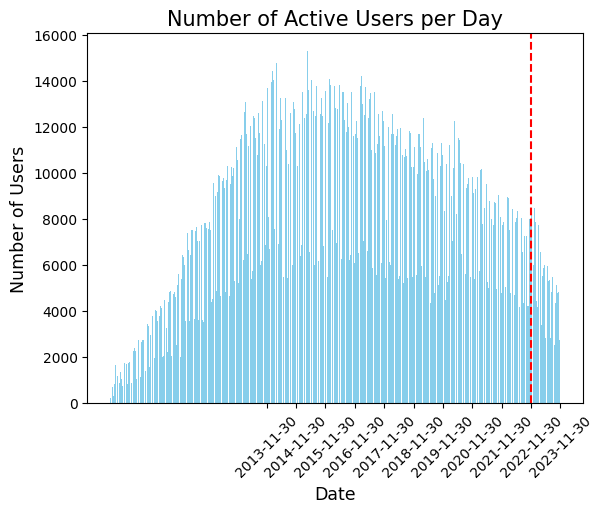

In [93]:
fig, ax = plt.subplots()


# ax.plot( df_active_usr_per_day_tot.creationdate, 
#         df_active_usr_per_day_tot['usr_cnt'].values, # specify data
#         color = 'green',
#         label = 'Total'
# ) 

ax.bar(df_active_usr_per_day_tot.creationdate
    ,  height = df_active_usr_per_day_tot['usr_cnt']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of Active Users per Day', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Users', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend


ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

plt.xticks(rotation=45)
plt.show();

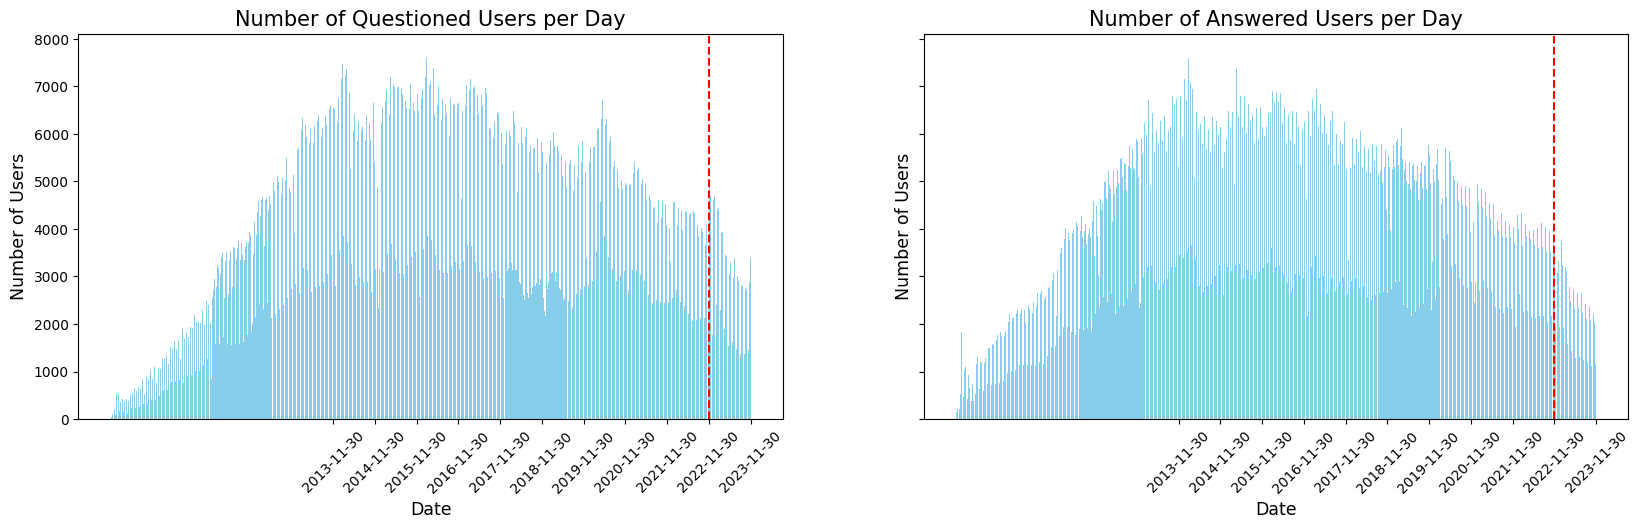

In [94]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].bar(df_active_usr_per_day_tot.creationdate
    ,  height = df_active_usr_per_day.loc[df_active_usr_per_day['posttypeid'] =='1', 'usr_cnt']
    ,  color = 'skyblue'
      ) # hist type

axs[1].bar(df_active_usr_per_day_tot.creationdate
    ,  height = df_active_usr_per_day.loc[df_active_usr_per_day['posttypeid'] =='2', 'usr_cnt']
    ,  color = 'skyblue'
      ) # hist type

axs[0].set_xticks(major_xticks)
axs[0].set_title('Number of Questioned Users per Day', fontsize = 15) # title
axs[0].set_xlabel('Date', fontsize = 12.5) # x-axis label
axs[0].set_ylabel('Number of Users', fontsize = 12.5) # y-axis label
axs[0].axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)

axs[1].set_xticks(major_xticks)
axs[1].set_title('Number of Answered Users per Day', fontsize = 15) # title
axs[1].set_xlabel('Date', fontsize = 12.5) # x-axis label
axs[1].set_ylabel('Number of Users', fontsize = 12.5) # y-axis label
axs[1].axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();

In [89]:
df_active_usr_per_day_pivot

posttypeid,creationdate,1,2,q_over_a
0,2008-07-31,3,2,66.666667
1,2008-08-01,33,41,124.242424
2,2008-08-02,21,38,180.952381
3,2008-08-03,28,50,178.571429
4,2008-08-04,59,93,157.627119
...,...,...,...,...
5599,2023-11-29,3443,2281,66.250363
5600,2023-11-30,3384,2286,67.553191
5601,2023-12-01,2945,2072,70.356537
5602,2023-12-02,1875,1260,67.200000


### Number of Unique answered users over Number of Unique questioned users per day

In [61]:
df_active_usr_per_day.loc[df_active_usr_per_day['posttypeid'] =='1', 'usr_cnt']

0           3
2          33
4          21
6          28
8          59
         ... 
11198    3443
11200    3384
11202    2945
11204    1875
11206     615
Name: usr_cnt, Length: 5604, dtype: int64

In [62]:
df_active_usr_per_day_pivot = df_active_usr_per_day.pivot(index='creationdate', columns = 'posttypeid', values = 'usr_cnt').reset_index()

In [63]:
df_active_usr_per_day_pivot['q_over_a'] = df_active_usr_per_day_pivot['2']/df_active_usr_per_day_pivot['1']*100

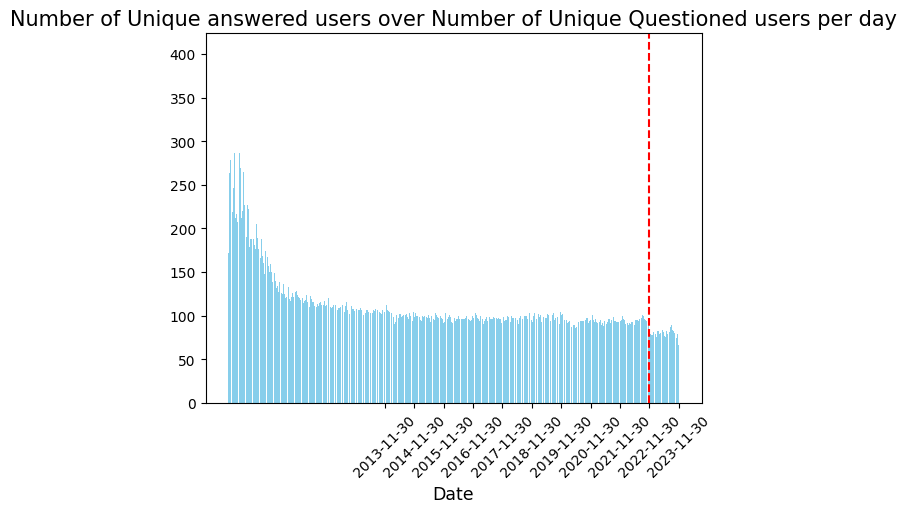

In [95]:
fig, ax = plt.subplots()


ax.bar(df_active_usr_per_day_pivot.creationdate
    ,  height = df_active_usr_per_day_pivot['q_over_a']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of Unique answered users over Number of Unique Questioned users per day', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.show();

In [91]:
df_active_usr_per_day_pivot

posttypeid,creationdate,1,2,q_over_a
0,2008-07-31,3,2,66.666667
1,2008-08-01,33,41,124.242424
2,2008-08-02,21,38,180.952381
3,2008-08-03,28,50,178.571429
4,2008-08-04,59,93,157.627119
...,...,...,...,...
5599,2023-11-29,3443,2281,66.250363
5600,2023-11-30,3384,2286,67.553191
5601,2023-12-01,2945,2072,70.356537
5602,2023-12-02,1875,1260,67.200000


## 5. votes

In [23]:
df_vote_cnt_per_day

,vote_creationdate,cnt
0,2008-07-31,6
1,2008-08-01,240
2,2008-08-02,555
3,2008-08-03,682
4,2008-08-04,1606
...,...,...
5599,2023-11-29,32822
5600,2023-11-30,31621
5601,2023-12-01,28709
5602,2023-12-02,16841


### Number of Votes per Day

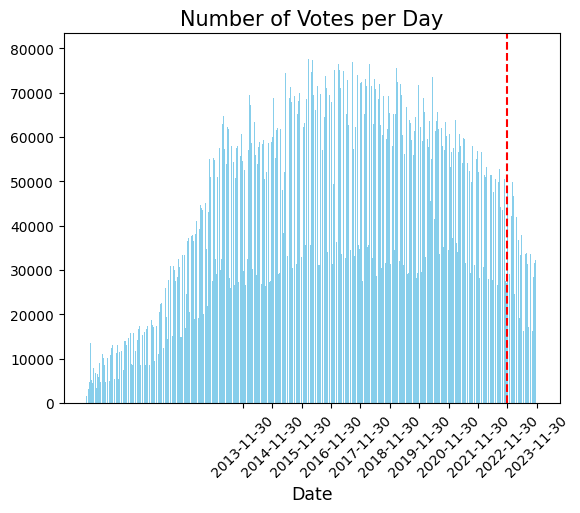

In [24]:
fig, ax = plt.subplots()


ax.bar(df_vote_cnt_per_day.vote_creationdate
    ,  height = df_vote_cnt_per_day['cnt']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of Votes per Day', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.show();

### Number of Votes within 1 month after question/answer post

In [25]:
df_vote_cnt_within_1month_per_day

,post_creationdate,cnt
0,2008-07-31,67
1,2008-08-01,473
2,2008-08-02,311
3,2008-08-03,394
4,2008-08-04,1120
...,...,...
5599,2023-11-29,4515
5600,2023-11-30,4334
5601,2023-12-01,3501
5602,2023-12-02,2692


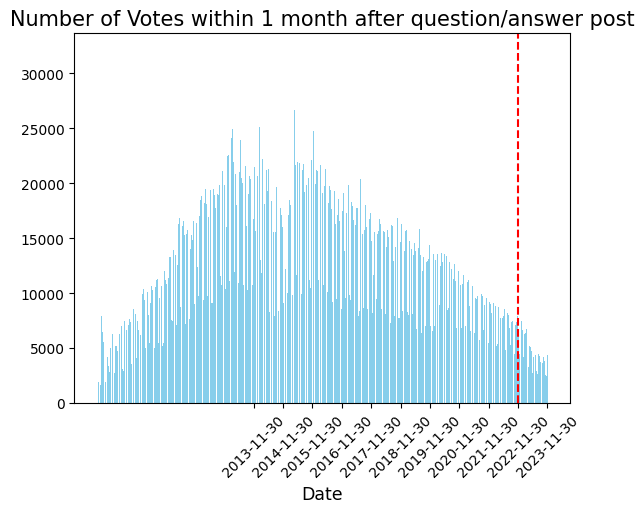

In [188]:
fig, ax = plt.subplots()


ax.bar(df_vote_cnt_within_1month_per_day.post_creationdate
    ,  height = df_vote_cnt_within_1month_per_day['cnt']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of Votes within 1 month after question/answer post', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.show();

### Number of UP/DOWN Votes within 1 month after question/answer post

In [190]:
df_vote_cnt_within_1month_per_day_qna

,post_creationdate,cnt
0,2008-07-31,66
1,2008-08-01,462
2,2008-08-02,299
3,2008-08-03,383
4,2008-08-04,1081
...,...,...
5599,2023-11-29,3640
5600,2023-11-30,3551
5601,2023-12-01,2917
5602,2023-12-02,2265


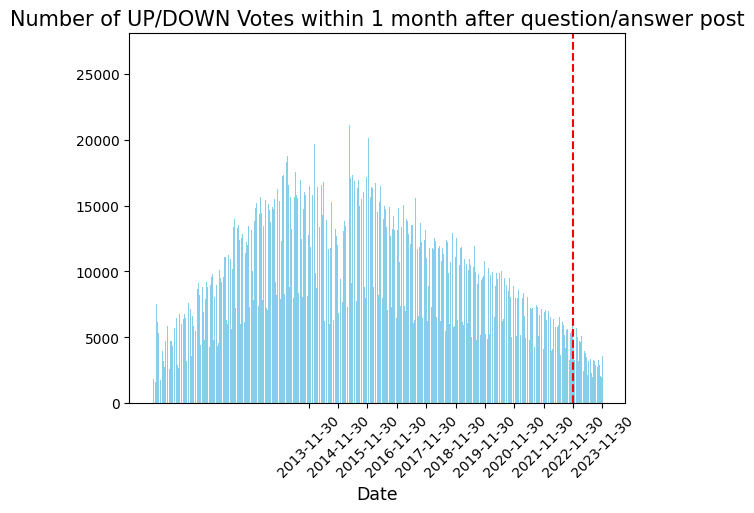

In [192]:
fig, ax = plt.subplots()


ax.bar(df_vote_cnt_within_1month_per_day_qna.post_creationdate
    ,  height = df_vote_cnt_within_1month_per_day_qna['cnt']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of UP/DOWN Votes within 1 month after question/answer post', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.show();

In [28]:
df_vote_cnt_within_1month_per_daytype_qna

,post_creationdate,posttypeid,vote_cnt
0,2008-07-31,1,39
1,2008-07-31,2,27
2,2008-08-01,1,164
3,2008-08-01,2,298
4,2008-08-02,1,95
...,...,...,...
11203,2023-12-01,2,1111
11204,2023-12-02,1,1530
11205,2023-12-02,2,735
11206,2023-12-03,1,434


In [29]:
df_vote_cnt_within_1month_per_daytype_qna_pivot = df_vote_cnt_within_1month_per_daytype_qna.pivot(index='post_creationdate', columns = 'posttypeid', values = 'vote_cnt').reset_index()

In [30]:
# df_usr_post_cre_cnt_pivot
df_vote_cnt_within_1month_per_daytype_qna_pivot['a_over_q'] = df_vote_cnt_within_1month_per_daytype_qna_pivot['2']/df_vote_cnt_within_1month_per_daytype_qna_pivot['1']

In [31]:
df_vote_cnt_within_1month_per_daytype_qna_pivot

posttypeid,post_creationdate,1,2,a_over_q
0,2008-07-31,39,27,0.692308
1,2008-08-01,164,298,1.817073
2,2008-08-02,95,204,2.147368
3,2008-08-03,113,270,2.389381
4,2008-08-04,405,676,1.669136
...,...,...,...,...
5599,2023-11-29,2235,1405,0.628635
5600,2023-11-30,2118,1433,0.676582
5601,2023-12-01,1806,1111,0.615172
5602,2023-12-02,1530,735,0.480392


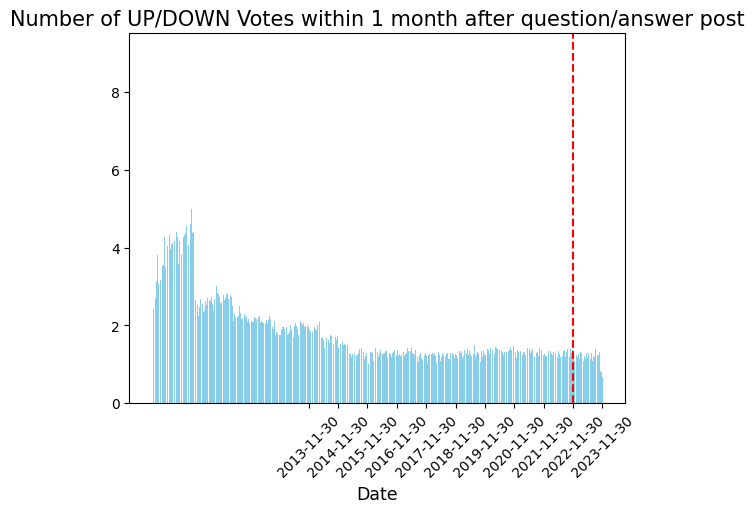

In [32]:
fig, ax = plt.subplots()


ax.bar(df_vote_cnt_within_1month_per_daytype_qna_pivot.post_creationdate
    ,  height = df_vote_cnt_within_1month_per_daytype_qna_pivot['a_over_q']
    ,  color = 'skyblue'
    # ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.set_title('Number of UP/DOWN Votes within 1 month after question/answer post', fontsize = 15) # title
ax.set_xlabel('Date', fontsize = 12.5) # x-axis label
ax.set_ylabel('', fontsize = 12.5) # y-axis label

# ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.show();